<a href="https://colab.research.google.com/github/TuringCollegeSubmissions/rfekad-ML.3/blob/master/335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Machine Learning

## Sprint 3: Unsupervised Learning & Hyperparameter Tuning

## Part 5: LendingClub

## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you solve a lending automation problem for LendingClub.
You will have to apply all you have learned about training and deploying machine learning models to complete this task.
Our expectation is that you'll use your own judgment on how to perform the analysis and select the most important avenues of modeling, statistical testing, and exploration.
You'll have to iteratively try to find patterns in the data, raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future.
For now just use what you have learned and try your best!

## Context

Imagine that you are a data scientist who was just hired by the LendingClub.
They want to automate their lending decisions fully, and they hired you to lead this project.
Your team consists of a product manager to help you understand the business domain and a software engineer who will help you integrate your solution into their product.
During the initial investigations, you've found that there was a similar initiative in the past, and luckily for you, they have left a somewhat clean dataset of LendingClub's loan data.
The dataset is located in a public bucket here: <https://storage.googleapis.com/335-lending-club/lending-club.zip> (although you were wondering if having your client data in a public bucket is such a good idea).
In the first meeting with your team, you all have decided to use this dataset because it will allow you to skip months of work of building a dataset from scratch.
In addition, you have decided to tackle this problem iteratively so that you can get test your hypothesis that you can automate these decisions and get actual feedback from the users as soon as possible.
For that, you have proposed a three-step plan on how to approach this problem.
The first step of your plan is to create a machine learning model to classify loans into accepted/rejected so that you can start learning if you have enough data to solve this simple problem adequately.
The second step is to predict the grade for the loan, and the third step is to predict the subgrade and the interest rate.
Your team likes the plan, especially because after every step, you'll have a fully-working deployed model that your company can use.
Excitedly you get to work!

## Objectives for this Part

- Practice downloading datasets from external sources.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using various types of machine learning models.
- Practice building ensembles of machine learning models.
- Practice using hyperparameter tuning.
- Practice using AutoML tools.
- Practice deploying machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries, and filtering data.

## Requirements

- Download the data from [here](https://storage.googleapis.com/335-lending-club/lending-club.zip).
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Apply various machine learning models to predict the target variables based on your proposed plan. You should use hyperparameter tuning, model ensembling, the analysis of model selection, and other methods. The decision where to use and not to use these techniques is up to you, however, they should be aligned with your team's objectives.
- Deploy these machine learning models to Google Cloud Platform. You are free to choose any deployment option you wish as long as it can be called an HTTP request.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results you got, and what these results mean.
- Provide suggestions about how your analysis and models can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface, or did you explored the dataset in-depth?
- Model's performance. How well did your model perform the predictions?
- Model's deployment. How performant, robust, and scalable your model deployment is?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented-out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use suitable algorithms and data structures to solve the problems?

## Correction

During your project correction, you should present your project as if talking to a product manager and senior data analyst working in your team.
You will have to find the right balance between explaining the business side and the technical aspects of your work.
You can assume that both of your colleagues have a strong understanding of and are very interested in the business aspect of your project, so be sure to clearly explain what new insights you've found while analyzing the dataset and which directions look the most promising for further research.
However, you should also spend time explaining the technical aspects of your work, especially the more complex or unconventional choices.

During a correction, you may get asked questions that test your understanding of covered topics.

- What dimensionality reduction algorithms do you know? What are their differences?
- What is the curse of dimensionality?
- What is the difference between DBSCAN and HDBSCAN?
- What hyperparameter tuning strategies do you know? What are their advantages compared to Grid Search and Random Search?
- Explain how SMOTE algorithm works? In which circumstances is this algorithm the most useful and in which it falls short?
- What is AutoML? Why is it important?


## General Correction Guidelines

For an in-depth explanation about how corrections work at Turing College, please read [this doc](https://turingcollege.atlassian.net/wiki/spaces/DLG/pages/537395951/Peer+expert+reviews+corrections).


# Summary

The objective of this analysis was to identify the most effective predictive model for loan repayment outcomes. After careful evaluation and comparison of various machine learning models including Logistic Regression, Decision Trees, Random Forest, XGBoost, LightGBM, and CatBoost, LightGBM emerged as the recommended model for deployment.

The analysis took into account a comprehensive range of metrics such as accuracy, precision, recall, and F1-scores for both "Charged Off" and "Fully Paid" loan categories. The models were rigorously tested and fine-tuned, with particular attention to their performance post hyperparameter tuning. While CatBoost initially showed a stronger performance, particularly in detecting potential defaults, the performance of LightGBM and CatBoost was almost equivalent after fine-tuning. LightGBM was ultimately chosen due to its balanced performance, efficiency, and adaptability.

### Importing important Modules

In [ ]:
!pip install black -q
!pip install auto-sklearn -q
!pip install nb_black -q

In [ ]:
!pip install xgboost -q
!pip install lightgbm -q
!pip install catboost -q
!pip install nb_black -q
!pip install boruta -q
!pip install --upgrade boruta -q
!pip install Boruta -q

In [ ]:
import numpy as np
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings("ignore", message="In a future version")
from scipy.stats import zscore
from scipy import stats
from scipy.stats import norm
from scipy.stats import zscore, ttest_1samp
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, f1_score
import joblib
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from tqdm import tqdm
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from boruta import BorutaPy
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from scipy.stats import uniform, randint
import shap
from sklearn.model_selection import RandomizedSearchCV



In [ ]:
print(np.__version__)

1.23.5


## Overview of the Data

In [ ]:
df_accepted = pd.read_csv(
    "accepted_2007_to_2018Q4.csv",
    index_col=0,low_memory=False
)

In [ ]:
df_accepted.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
id,,,,,,,,,,,,,,,,,,,,,
68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_accepted.columns.to_list()

['member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joi

## Selecting Features

Following an in-depth analysis of the 150 data rows, the following features have been identified as key indicators to assist in predicting the acceptance or rejection of a loan application. These features are crucial as they offer a comprehensive view into the borrower's creditworthiness, repayment capacity, and overall financial health.

1. **loan_amnt**: The total amount of money the borrower is asking for in the loan.

2. **term**: The length of time over which the loan is to be repaid.

3. **int_rate**: The interest rate on the loan.

4. **sub_grade**: The subcategory grade assigned to the borrower based on their creditworthiness, usually a finer scale within a broader credit grade.

5. **bc_util**: The borrower's credit card utilization rate for bankcard accounts, a measure of credit card debt relative to total credit limits.

6. **fico_range_high**: The upper end of the borrower's FICO credit score range.

7. **revol_util**: The amount of credit the borrower is using relative to all available revolving credit, expressed as a percentage.

8. **emp_length**: The length of time the borrower has been employed at their current job.

9. **home_ownership**: The borrower's housing status, such as renting, owning, or having a mortgage.

10. **addr_state**: The U.S. state in which the borrower resides.

11. **fico_range_low**: The lower end of the borrower's FICO credit score range.

12. **inq_last_6mths**: The number of inquiries on the borrower's credit report in the past 6 months, excluding auto and mortgage inquiries.

13. **annual_inc**: The borrower's annual income.

14. **bc_open_to_buy**: The total available credit the borrower has on open bankcard accounts.

15. **dti**: The debt-to-income ratio, a percentage that shows how much of the borrower’s gross monthly income goes towards paying debts.

16. **mths_since_recent_inq**: Months since the borrower's most recent inquiry on their credit report.

17. **total_acc**: The total number of credit lines currently in the borrower's credit file.

18. **num_op_rev_tl**: The number of open revolving trade lines, which are credit accounts like credit cards and lines of credit.

19. **grade**: A classification given by the lending platform to indicate the risk level of the loan, usually from A (less risky) to G (more risky).

20. **issue_d**: The date the loan was issued.

21. **loan_status**: The current status of the loan, such as current, late, fully paid, or charged-off.


In [ ]:
columns = [
    "loan_amnt",
    "term",
    "int_rate",
    "sub_grade",
    "bc_util",
    "fico_range_high",
    "revol_util",
    "emp_length",
    "home_ownership",
    "addr_state",
    "fico_range_low",
    "inq_last_6mths",
    "annual_inc",
    "bc_open_to_buy",
    "dti",
    "mths_since_recent_inq",
    "total_acc",
    "num_op_rev_tl",
    "grade",
    "issue_d",
    "loan_status",
]

In [ ]:
df = df_accepted[columns]
df.to_csv("chosen.csv")

In [ ]:
df.head()

,loan_amnt,term,int_rate,sub_grade,bc_util,fico_range_high,revol_util,emp_length,home_ownership,addr_state,...,inq_last_6mths,annual_inc,bc_open_to_buy,dti,mths_since_recent_inq,total_acc,num_op_rev_tl,grade,issue_d,loan_status
id,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,36 months,13.99,C4,37.2,679.0,29.7,10+ years,MORTGAGE,PA,...,1.0,55000.0,1506.0,5.91,4.0,13.0,4.0,C,Dec-2015,Fully Paid
68355089,24700.0,36 months,11.99,C1,27.1,719.0,19.2,10+ years,MORTGAGE,SD,...,4.0,65000.0,57830.0,16.06,0.0,38.0,20.0,C,Dec-2015,Fully Paid
68341763,20000.0,60 months,10.78,B4,55.9,699.0,56.2,10+ years,MORTGAGE,IL,...,0.0,63000.0,2737.0,10.78,10.0,18.0,4.0,B,Dec-2015,Fully Paid
66310712,35000.0,60 months,14.85,C5,12.1,789.0,11.6,10+ years,MORTGAGE,NJ,...,0.0,110000.0,54962.0,17.06,NaN,17.0,10.0,C,Dec-2015,Current
68476807,10400.0,60 months,22.45,F1,77.5,699.0,64.5,3 years,MORTGAGE,PA,...,3.0,104433.0,4567.0,25.37,1.0,35.0,7.0,F,Dec-2015,Fully Paid


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260701 entries, 68407277 to Total amount funded in policy code 2: 521953170
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   loan_amnt              float64
 1   term                   object 
 2   int_rate               float64
 3   sub_grade              object 
 4   bc_util                float64
 5   fico_range_high        float64
 6   revol_util             float64
 7   emp_length             object 
 8   home_ownership         object 
 9   addr_state             object 
 10  fico_range_low         float64
 11  inq_last_6mths         float64
 12  annual_inc             float64
 13  bc_open_to_buy         float64
 14  dti                    float64
 15  mths_since_recent_inq  float64
 16  total_acc              float64
 17  num_op_rev_tl          float64
 18  grade                  object 
 19  issue_d                object 
 20  loan_status            object 
dtypes: float64(1

In [ ]:
df.describe()

,loan_amnt,int_rate,bc_util,fico_range_high,revol_util,fico_range_low,inq_last_6mths,annual_inc,bc_open_to_buy,dti,mths_since_recent_inq,total_acc,num_op_rev_tl
count,2.260668e+06,2.260668e+06,2.184597e+06,2.260668e+06,2.258866e+06,2.260668e+06,2.260638e+06,2.260664e+06,2.185733e+06,2.258957e+06,1.965233e+06,2.260639e+06,2.190392e+06
mean,1.504693e+04,1.309283e+01,5.789995e+01,7.025884e+02,5.033770e+01,6.985882e+02,5.768354e-01,7.799243e+04,1.139426e+04,1.882420e+01,7.024194e+00,2.416255e+01,8.246523e+00
std,9.190245e+03,4.832138e+00,2.858347e+01,3.301124e+01,2.471307e+01,3.301038e+01,8.859632e-01,1.126962e+05,1.659953e+04,1.418333e+01,5.965411e+00,1.198753e+01,4.683928e+00
min,5.000000e+02,5.310000e+00,0.000000e+00,6.140000e+02,0.000000e+00,6.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,8.000000e+03,9.490000e+00,3.540000e+01,6.790000e+02,3.150000e+01,6.750000e+02,0.000000e+00,4.600000e+04,1.722000e+03,1.189000e+01,2.000000e+00,1.500000e+01,5.000000e+00
50%,1.290000e+04,1.262000e+01,6.020000e+01,6.940000e+02,5.030000e+01,6.900000e+02,0.000000e+00,6.500000e+04,5.442000e+03,1.784000e+01,5.000000e+00,2.200000e+01,7.000000e+00
75%,2.000000e+04,1.599000e+01,8.310000e+01,7.190000e+02,6.940000e+01,7.150000e+02,1.000000e+00,9.300000e+04,1.418700e+04,2.449000e+01,1.100000e+01,3.100000e+01,1.000000e+01
max,4.000000e+04,3.099000e+01,3.396000e+02,8.500000e+02,8.923000e+02,8.450000e+02,3.300000e+01,1.100000e+08,7.111400e+05,9.990000e+02,2.500000e+01,1.760000e+02,9.100000e+01


### Check if there are any missing values and dublicates in the DataFrame

In [ ]:
missing_values_count = df.isnull().sum()
print(f"Missing Values")
print(missing_values_count)
print()
print(f"There are {df.duplicated().sum()} duplicates.")
print()

Missing Values
loan_amnt                    33
term                         33
int_rate                     33
sub_grade                    33
bc_util                   76104
fico_range_high              33
revol_util                 1835
emp_length               146940
home_ownership               33
addr_state                   33
fico_range_low               33
inq_last_6mths               63
annual_inc                   37
bc_open_to_buy            74968
dti                        1744
mths_since_recent_inq    295468
total_acc                    62
num_op_rev_tl             70309
grade                        33
issue_d                      33
loan_status                  33
dtype: int64

There are 32 duplicates.



In [ ]:
print(f"There are {df_accepted.duplicated().sum()} duplicates.")

There are 32 duplicates.


## Outliers

In [ ]:
df_numeric = df.select_dtypes(include=["number"])
len_df_numeric = len(df_numeric.columns)
len_df_numeric

13

In [ ]:
outlier_data = []
for column in df_numeric.columns:
    Q1 = df_numeric[column].quantile(0.25)
    Q3 = df_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = df_numeric[column][
        (df_numeric[column] < lower_bound) | (df_numeric[column] > upper_bound)
    ].count()
    outlier_data.append(
        {
            "Column": column,
            "Outlier_Count": outlier_count,
            "Percentage_Outliers": outlier_count / len(df) * 100,
        }
    )

outlier_counts_df = pd.DataFrame(outlier_data)

print(outlier_counts_df)

                   Column  Outlier_Count  Percentage_Outliers
0               loan_amnt          35215             1.557703
1                int_rate          41099             1.817976
2                 bc_util             82             0.003627
3         fico_range_high          74846             3.310743
4              revol_util            114             0.005043
5          fico_range_low          74846             3.310743
6          inq_last_6mths          94314             4.171892
7              annual_inc         110041             4.867561
8          bc_open_to_buy         180429             7.981109
9                     dti          21580             0.954571
10  mths_since_recent_inq             31             0.001371
11              total_acc          39411             1.743309
12          num_op_rev_tl          98094             4.339097


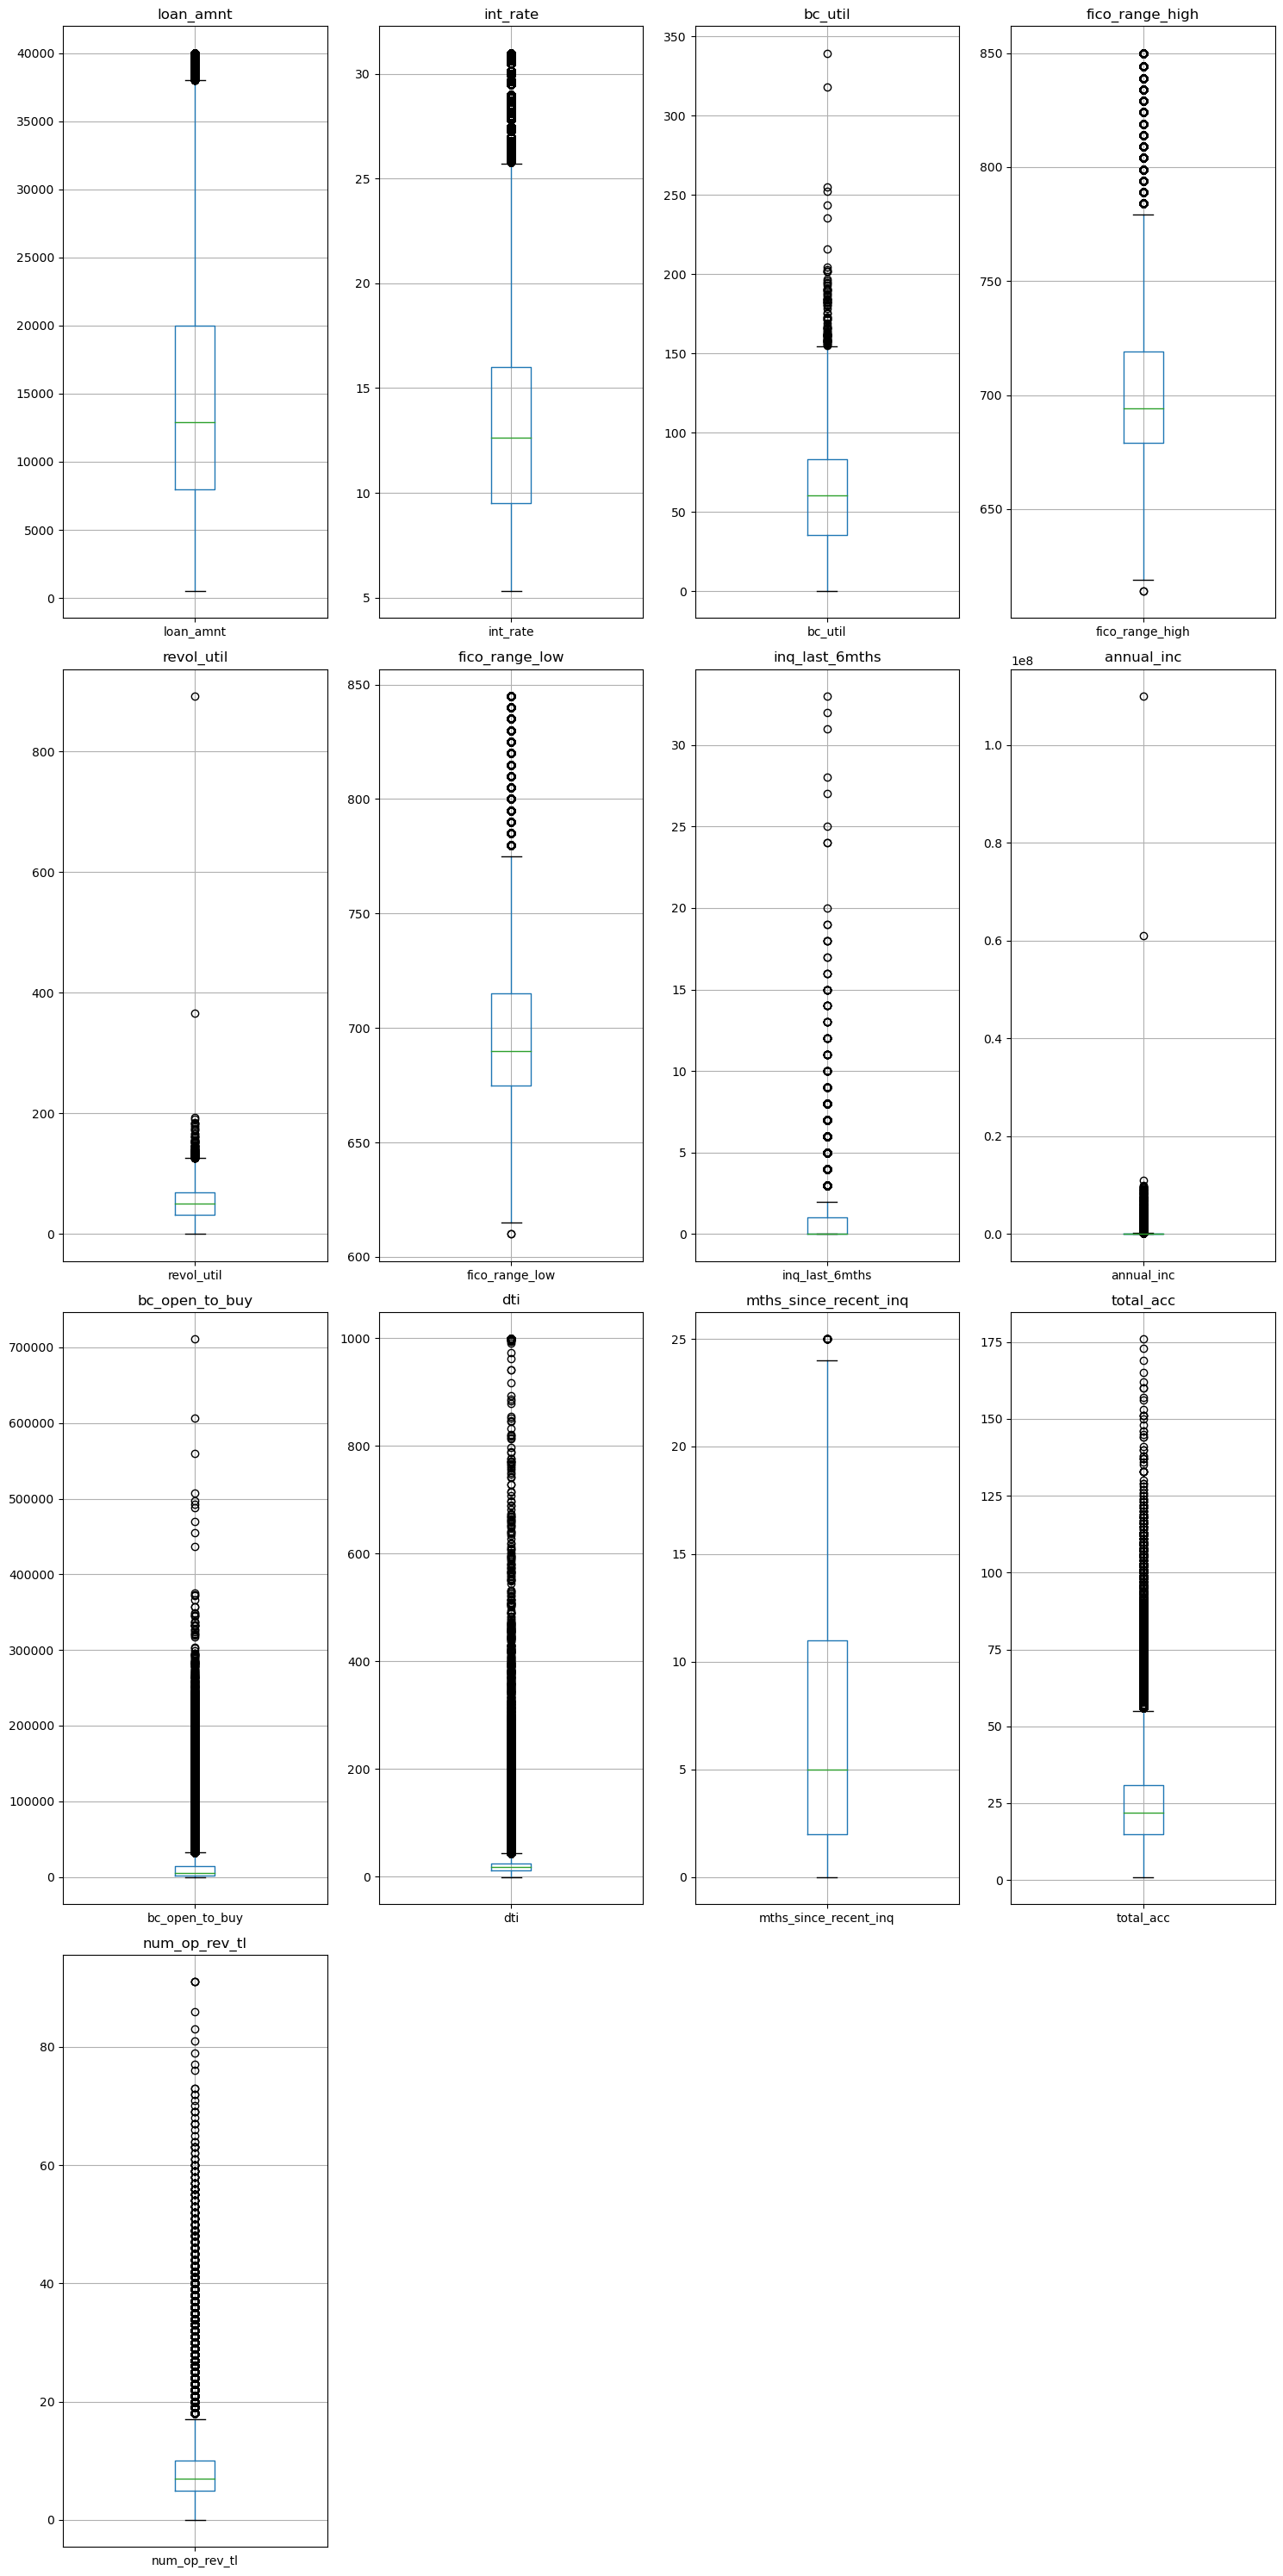

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 30))
axes = axes.flatten()


for i, column in enumerate(df_numeric.columns):
    df_numeric.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

for j in range(13, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Creating Date

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['year'] = df['issue_d'].dt.year


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## Exploratory Data Analysis

In order to inverstivate and complete our EDA, the below questions are going to be followed

1. **Visualizing Distributions of Numerical Features**
   - *Question*: What is the distribution of each numerical feature in the dataset?

2. **Analyzing Loan Amount Trends**
   - *Question*: What are the characteristics of the loan amount distribution across all loans?

3. **Exploring Loan Status Categories**
   - *Question*: What is the breakdown of the different loan status categories within the dataset?

4. **Interest Rate Variation by Loan Status**
   - *Question*: How do interest rates vary between different loan statuses?

5. **Handling Missing Data in the Dataset**
   - *Question*: Which columns have missing data and what strategies should be used to address them?

6. **Capping Outliers in Annual Income**
   - *Question*: Are there outliers in the annual income data, and how should they be handled?

7. **FICO Score's Influence on Loan Status**
   - *Question*: Is there a relationship between FICO scores and different loan statuses?

8. **Debt-to-Income Ratio's Correlation with Loan Status**
   - *Question*: Does the debt-to-income (DTI) ratio have a correlation with loan status, and is it significant?

9. **Employment Length influence in Application Status**
   - *Question*: Can Employment Length provide additional insights when predicting Application status?

10. **Loan Amount Differences by Loan Status**
    - *Question*: Are there significant differences in loan amounts when comparing different loan status categories?

11. **Correlation Analysis**
    - *Question*: Is there a correlation among the numerical features?
    - *Question*: Which of these variables strongly correlate with one another, if at all?
    
12. **Categorical Features**
    - *Question*: Are the various categories within the categorical features equally represented in the dataset?
    - *Question*: Are there any imbalances or biases among these categories that stand out
    
13. **Relationship between Loan amount, Annual income and Loan Status**
    - *Question*: Does loan amount increase with increase in the annual income?
    - *Question*: Does loan amount and annual income influence the Loan status?
    
14. **Statistical Inference**
    - *Question*: Does increase in annual income influence affect the Loan Status potivively?
    - *Question*: Does the employment length affect the Loan Status?


## 1. **Visualizing Distributions of Numerical Features**

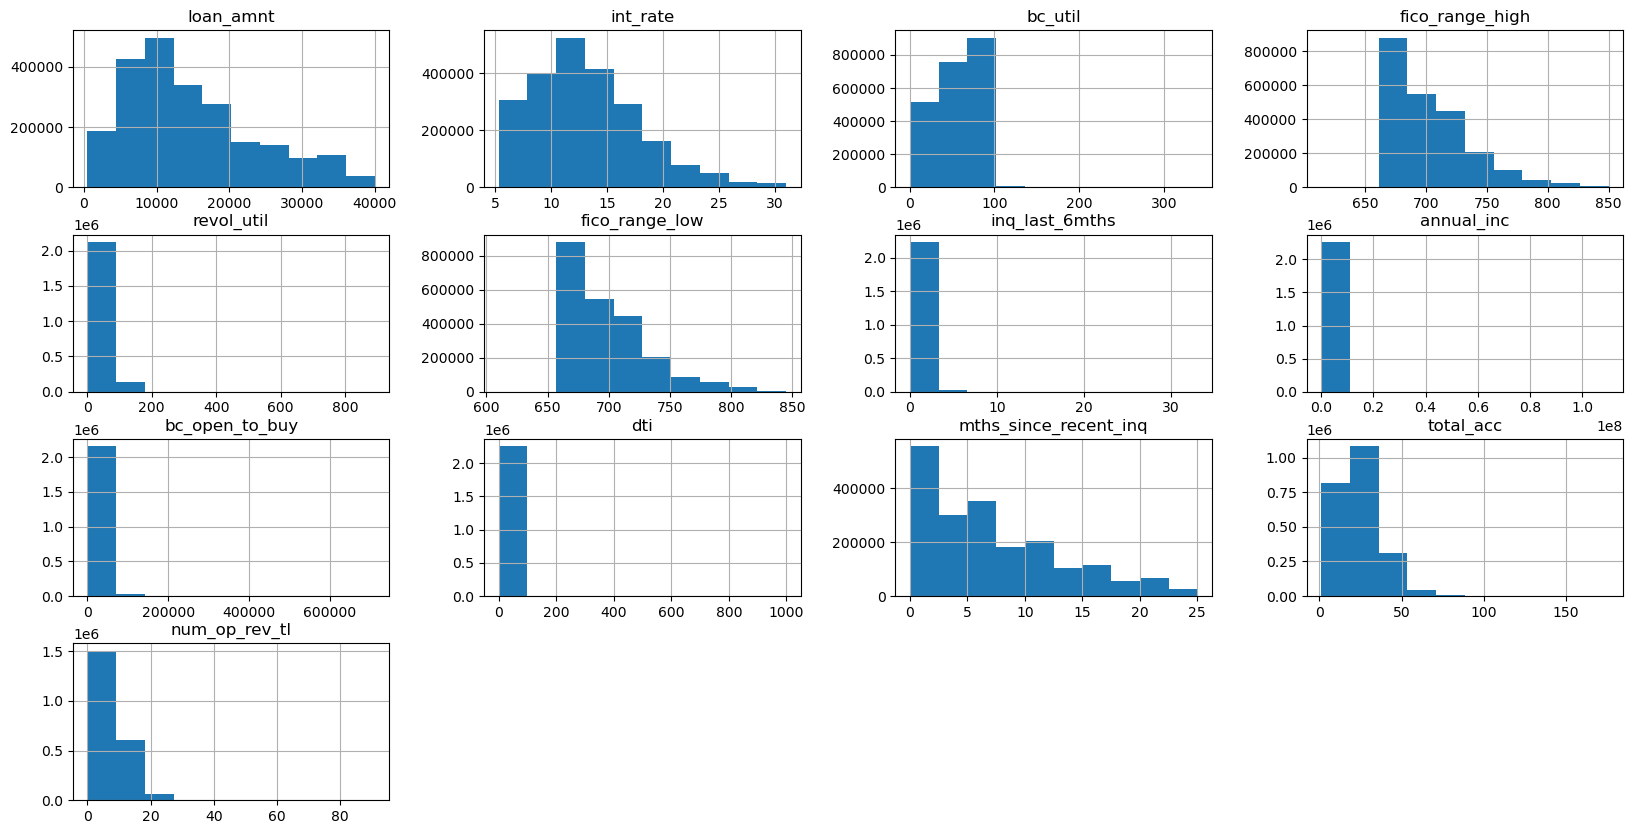

In [ ]:
_ = df_numeric.hist(bins=10, figsize=(20, 10))

## 2. **Analyzing Loan Amount Trends**

The histogram for 'loan_amnt' shows a right-skewed distribution, indicating that a larger number of loans are of lower amounts, with fewer loans having higher amounts. The frequency decreases as the loan amount increases, which is typical for personal or small business loans where smaller amounts are more commonly requested. There's a notable concentration of loans at the lower end of the scale, and very few loans are at the highest amount range, suggesting either a cap on the loan amounts or a natural decline in the frequency of high-value loans.

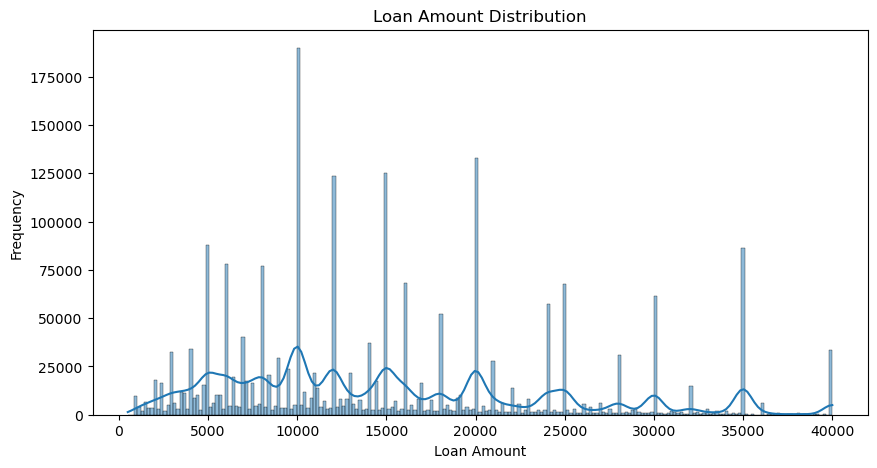

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["loan_amnt"], kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

The graph indicates a right-skewed distribution of loan amounts with pronounced peaks at regular intervals, suggesting preferred loan sizes. Smaller loans are more common, with a sharp decline in frequency for higher amounts, implying a cap near 40,000.

## 3. **Exploring Loan Status Categories**

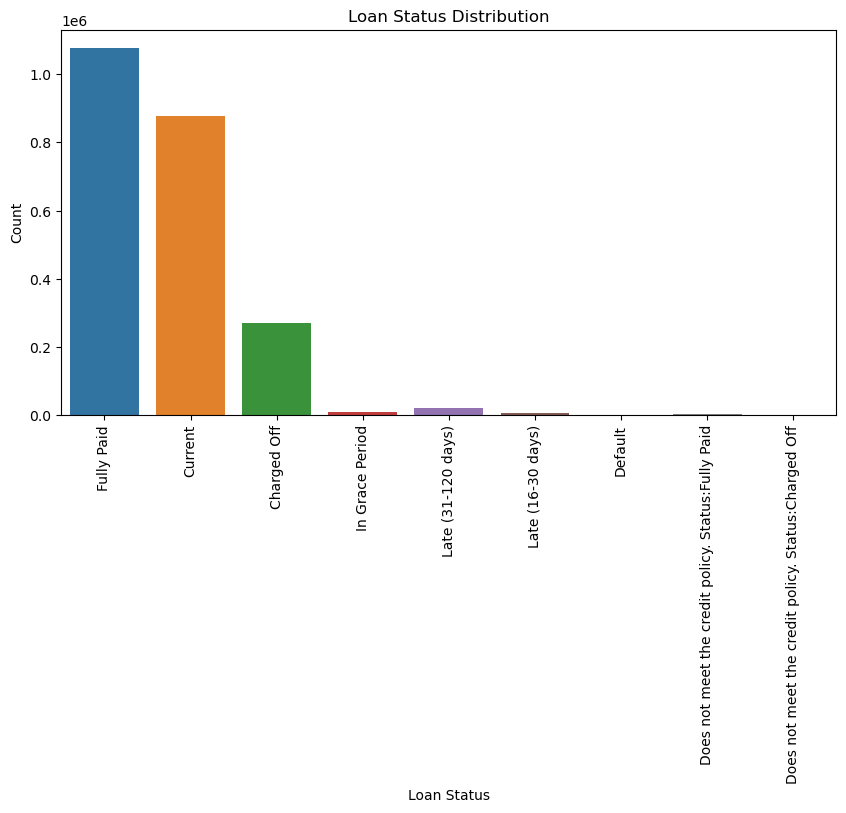

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64


In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="loan_status", data=df)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.show()
print(df.loan_status.value_counts())

The result above reflects the distribution of loan statuses, with the top three being 'Fully Paid' (1,076,751), 'Current' (878,317), and 'Charged Off' (268,559).

## 4. **Interest Rate Variation by Loan Status**

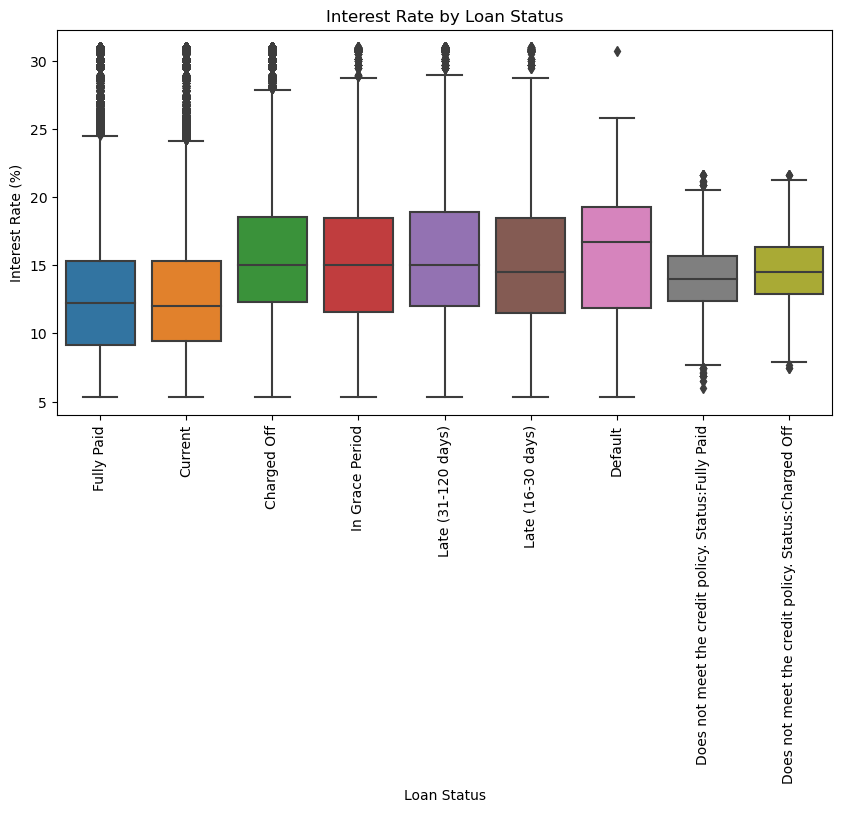

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="loan_status", y="int_rate", data=df)
plt.title("Interest Rate by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate (%)")
plt.xticks(rotation=90)
plt.show()

The above boxplot shows that there are many outliers for Interest Rate in all loan status.

## 5. **Handling Missing Data in the Dataset**

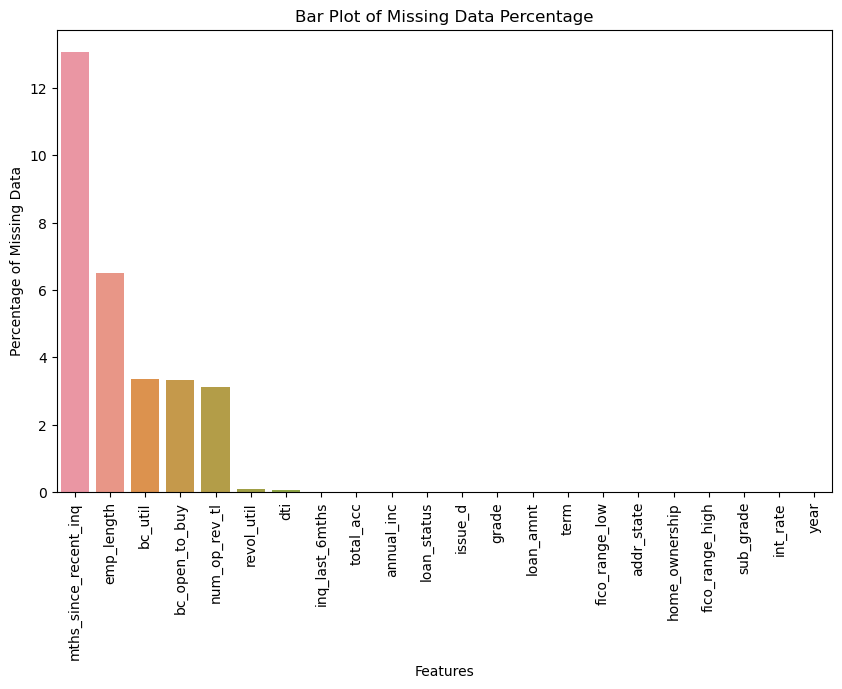

In [ ]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_df = pd.concat(
    [missing_data, missing_percentage], axis=1, keys=["Total Missing", "Percentage"]
)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df.index, y="Percentage", data=missing_df)
plt.title("Bar Plot of Missing Data Percentage")
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Data")
plt.xticks(rotation=90)
plt.show()

The above barplot shows that mths_since_recent_inq, emp_length, bc_util, bc_open_to_buy and num_op_rev_tl have the highest number of missing value in the dataset.

## 6. **Capping Outliers in Annual Income**

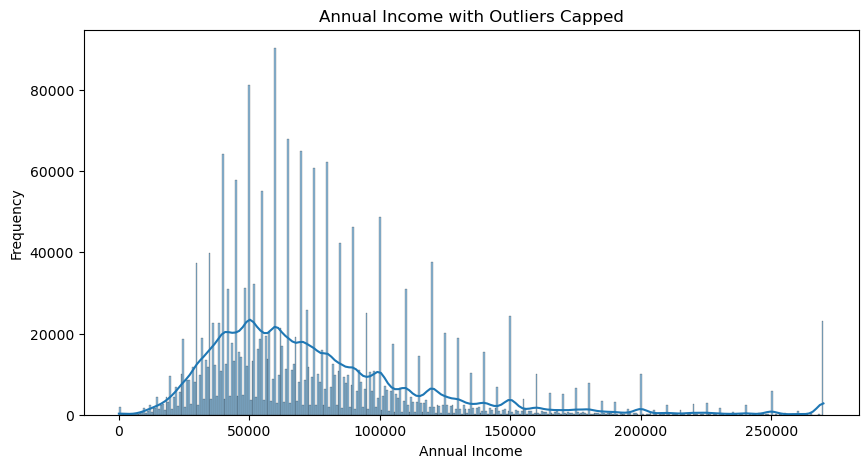

In [ ]:
df_copy = df.copy()

income_cap = df_copy["annual_inc"].quantile(0.99)

df_copy["annual_inc_capped"] = df_copy["annual_inc"].apply(lambda x: min(x, income_cap))

plt.figure(figsize=(10, 5))
sns.histplot(df_copy["annual_inc_capped"], kde=True)
plt.title("Annual Income with Outliers Capped")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

## 7. **FICO Score's Influence on Loan Status**

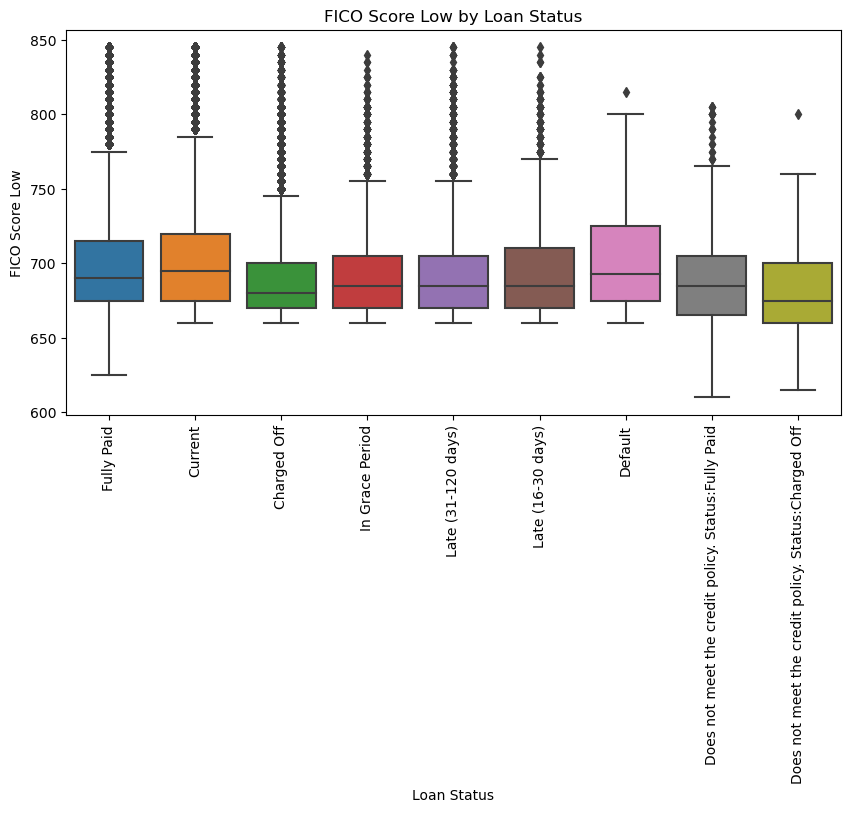

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="loan_status", y="fico_range_low", data=df)
plt.title("FICO Score Low by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("FICO Score Low")
plt.xticks(rotation=90)
plt.show()

The above boxplot shows that there are many outliers for FICO Score low in all loan status.

## 8. **Debt-to-Income Ratio's Correlation with Loan Status**

In [ ]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Let's first create a feature called 'application_status'. This feature is if the the loan should be accepted or rejected based on the 'loan_status'. According to the investigation, 'loan_status' feature have the following observations
* 'Fully Paid',
* 'Current',
* 'Charged Off',
* 'In Grace Period',
* 'Late (31-120 days)',
* 'Late (16-30 days)',
* 'Default',
* 'Does not meet the credit policy. Status:Fully Paid',
* 'Does not meet the credit policy. Status:Charged Off

We can confidently categorize loans labeled as 'Fully Paid' as acceptable and those marked as 'Charged Off' as rejectable. However, for loans in the 'Current', 'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)', and 'Default' categories, it's premature to definitively classify them as either acceptable or rejectable since their statuses have not reached a conclusion. Additionally, while the statuses 'Does not meet the credit policy. Status: Fully Paid' and 'Does not meet the credit policy. Status: Charged Off' clearly indicate the final status of these loans, they represent exceptional cases and should not be used as a standard for other loans.

In [ ]:
def classify_loan_status(status):
    if status == "Fully Paid":
        return 1
    elif status == "Charged Off":
        return 0
    else:
        return np.nan


df_copy = df.copy()


df_copy["application_status"] = df_copy["loan_status"].apply(classify_loan_status)

df_copy = df_copy.dropna(axis=0)

In [ ]:
correlation_coefficient, _ = stats.pearsonr(
    df_copy["dti"], df_copy["application_status"]
)
p_value = stats.pearsonr(df_copy["dti"], df_copy["application_status"])[1]

if p_value < 0.05:
    significance = "significant"
else:
    significance = "not significant"

print(
    "The DTI ratio has a Pearson correlation coefficient of {:.2f}"
    ", indicating a {} linear relationship with loan status. This correlation is {} "
    " with a p-value of {:.4f}.".format(
        correlation_coefficient,
        "positive" if correlation_coefficient > 0 else "negative",
        significance,
        p_value,
    )
)

The DTI ratio has a Pearson correlation coefficient of -0.09, indicating a negative linear relationship with loan status. This correlation is significant  with a p-value of 0.0000.


## 9. **Employment Length influence in Application Status**

In [ ]:
df_copy["emp_length"].unique()

array(['10+ years', '3 years', '6 years', '7 years', '8 years', '2 years',
       '5 years', '9 years', '< 1 year', '4 years', '1 year'],
      dtype=object)

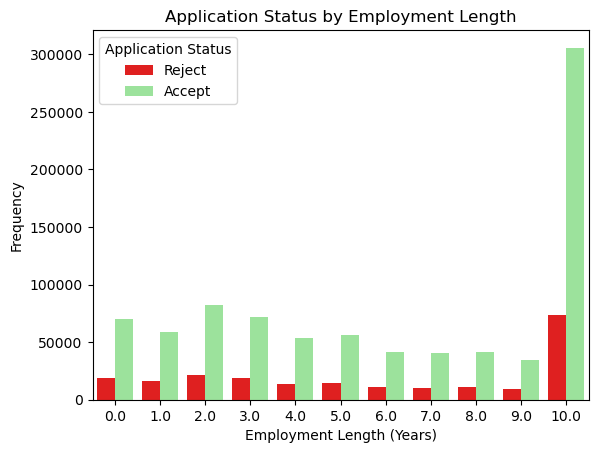

In [ ]:
df_copy["emp_length_years"] = df_copy["emp_length"].replace(
    {"10+ years": "10", "< 1 year": "0"}
)
df_copy["emp_length_years"] = (
    df_copy["emp_length_years"].str.extract("(\d+)").astype(float)
)

palette = {0: "red", 1: "#90ee90"}

sns.countplot(
    x="emp_length_years", hue="application_status", data=df_copy, palette=palette
)
plt.title("Application Status by Employment Length")
plt.xlabel("Employment Length (Years)")
plt.ylabel("Frequency")


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["Reject", "Accept"], title="Application Status")

plt.show()

The bar graph illustrates a clear trend in application outcomes as they relate to the length of an applicant's employment. Specifically, it suggests that applicants with 10 years of employment are far more likely to have their applications accepted compared to those with fewer years of employment. This pattern could imply that longevity in employment is a significant factor in the application review process.

## 10. **Loan Amount Differences by Loan Status**

In [ ]:
grouped = df.groupby("loan_status")["loan_amnt"]

for name, group in grouped:
    full_data = df["loan_amnt"].dropna()
    group_data = group.dropna()

    if len(full_data) < 2 or len(group_data) < 2:
        print(f"Not enough data for t-test in {name}")
        continue

    t_stat, p_value = stats.ttest_ind(full_data, group_data, equal_var=False)

    print(
        f"T-test for Loan Amount across {name}: t-statistic = {t_stat}, p-value = {p_value}"
    )

T-test for Loan Amount across Charged Off: t-statistic = -28.66681800302577, p-value = 1.622260052378024e-180
T-test for Loan Amount across Current: t-statistic = -74.12482801177985, p-value = 0.0
T-test for Loan Amount across Default: t-statistic = 0.4265678303428685, p-value = 0.6720395611605394
T-test for Loan Amount across Does not meet the credit policy. Status:Charged Off: t-statistic = 23.766498778011655, p-value = 7.985279748522675e-94
T-test for Loan Amount across Does not meet the credit policy. Status:Fully Paid: t-statistic = 44.76213382204923, p-value = 1.5693681354172704e-303
T-test for Loan Amount across Fully Paid: t-statistic = 88.15635265150037, p-value = 0.0
T-test for Loan Amount across In Grace Period: t-statistic = -24.692605964996215, p-value = 4.585420557511649e-130
T-test for Loan Amount across Late (16-30 days): t-statistic = -15.46659646690944, p-value = 1.4177004517035943e-52
T-test for Loan Amount across Late (31-120 days): t-statistic = -28.67244850063244,

The t-test results indicate significant differences in loan amounts across different loan statuses compared to the overall distribution. For statuses like 'Charged Off', 'Current', 'In Grace Period', 'Late (16-30 days)', and 'Late (31-120 days)', the negative t-statistics and near-zero p-values suggest these categories have lower average loan amounts than the overall mean, with the differences being statistically significant. Conversely, 'Does not meet the credit policy. Status:Charged Off', 'Does not meet the credit policy. Status:Fully Paid', and 'Fully Paid' show significantly higher loan amounts with positive t-statistics and extremely low p-values. 'Default' shows no significant difference from the overall average, indicated by a t-statistic close to zero and a high p-value.

## 11. *Correlation Analysis*

In [ ]:
df_numeric.corr()

,loan_amnt,int_rate,bc_util,fico_range_high,revol_util,fico_range_low,inq_last_6mths,annual_inc,bc_open_to_buy,dti,mths_since_recent_inq,total_acc,num_op_rev_tl
loan_amnt,1.000000,0.098082,0.048369,0.110584,0.099078,0.110585,-0.027840,0.197246,0.205407,0.043542,0.001975,0.199570,0.161767
int_rate,0.098082,1.000000,0.277119,-0.415991,0.262670,-0.415995,0.188399,-0.050583,-0.297321,0.124491,-0.145741,-0.040951,-0.016596
bc_util,0.048369,0.277119,1.000000,-0.497303,0.868537,-0.497305,-0.069406,0.004787,-0.541888,0.117817,0.084705,-0.069610,-0.147148
fico_range_high,0.110584,-0.415991,-0.497303,1.000000,-0.476999,1.000000,-0.093277,0.037008,0.509310,-0.027931,0.076207,0.016192,0.011139
revol_util,0.099078,0.262670,0.868537,-0.476999,1.000000,-0.477001,-0.078520,0.028207,-0.483600,0.115225,0.093342,-0.093147,-0.198031
fico_range_low,0.110585,-0.415995,-0.497305,1.000000,-0.477001,1.000000,-0.093276,0.037009,0.509307,-0.027929,0.076205,0.016193,0.011139
inq_last_6mths,-0.027840,0.188399,-0.069406,-0.093277,-0.078520,-0.093276,1.000000,0.020001,0.014483,-0.012189,-0.564312,0.154855,0.148535
annual_inc,0.197246,-0.050583,0.004787,0.037008,0.028207,0.037009,0.020001,1.000000,0.103020,-0.082619,-0.027587,0.115271,0.057400
bc_open_to_buy,0.205407,-0.297321,-0.541888,0.509310,-0.483600,0.509307,0.014483,0.103020,1.000000,-0.036036,-0.022846,0.238753,0.370634
dti,0.043542,0.124491,0.117817,-0.027931,0.115225,-0.027929,-0.012189,-0.082619,-0.036036,1.000000,0.006330,0.147335,0.116192


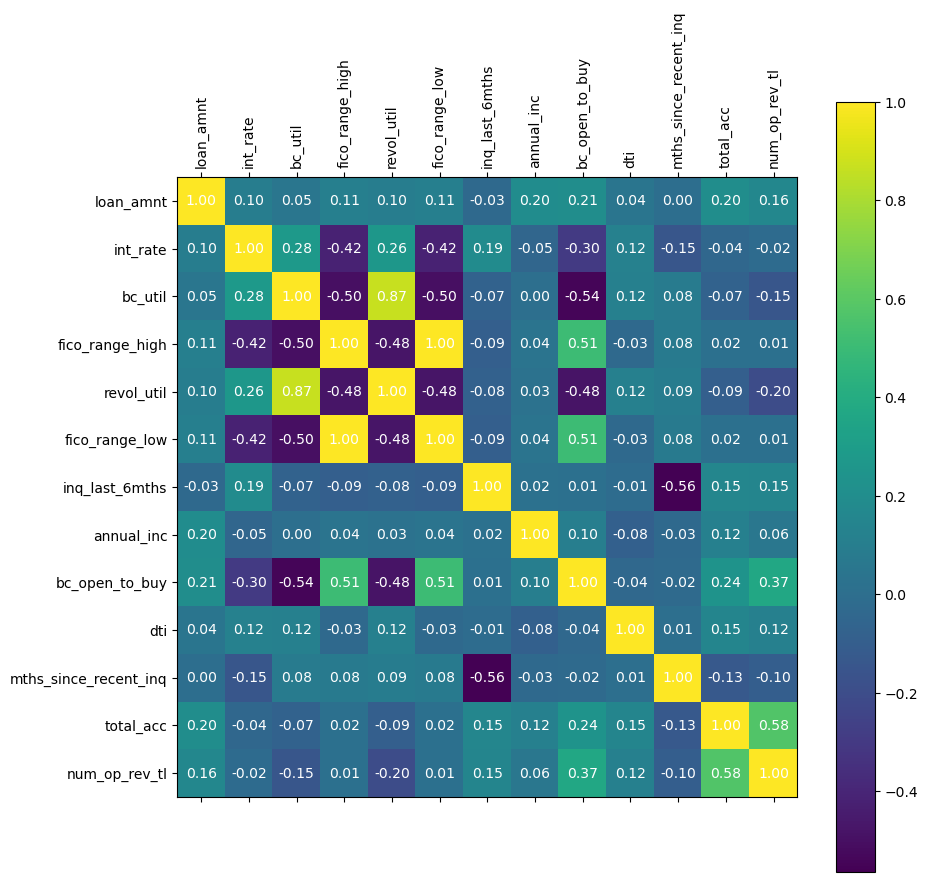

In [ ]:
def plot_corr(df, size=10):
    corr = df_numeric.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr)
    fig.colorbar(cax)

    plt.xticks(range(len(corr.columns)), corr.columns, rotation="vertical")
    plt.yticks(range(len(corr.columns)), corr.columns)

    for i in range(len(corr.columns)):
        for j in range(len(corr.columns)):
            text = f"{corr.iloc[i, j]:.2f}"
            ax.annotate(
                text, xy=(i, j), fontsize=10, ha="center", va="center", color="w"
            )

    plt.show()


plot_corr(df)

Base on the correlation matrix above, the following can be observed:

1. **Strong Correlations with FICO Scores**: There's a notable negative correlation between interest rates (`int_rate`) and FICO scores (`fico_range_high` and `fico_range_low`, both with a correlation of approximately -0.416). This indicates that higher FICO scores are typically associated with lower interest rates. Similarly, FICO scores show a strong negative correlation with `bc_util` (credit utilization on bankcard accounts), suggesting that higher credit scores correlate with lower utilization rates.

2. **Loan Amount and Income**: `loan_amnt` has a moderate positive correlation with `annual_inc` (0.197) indicating that borrowers with higher incomes tend to take larger loans. The correlation between `loan_amnt` and `bc_open_to_buy` (available credit on bankcard accounts) is also significant (0.205), suggesting that borrowers with more available credit also tend to take larger loans.

3. **Revolving Credit Utilization**: `revol_util` (revolving line utilization rate) has a very high correlation with `bc_util` (0.869), which is expected as they both measure credit utilization, albeit in slightly different ways. Both of these show negative correlations with FICO scores and `bc_open_to_buy`, reinforcing the concept that higher credit utilization is often associated with lower credit scores and less available credit.

4. **Inquiries and Recent Credit Activity**: `inq_last_6mths` (number of credit inquiries in the past 6 months) shows a strong negative correlation with `mths_since_recent_inq` (months since most recent inquiry), which is logical as more recent inquiries would reduce the months since the last inquiry.

5. **Total Accounts and Open Revolving Accounts**: There's a significant positive correlation between `total_acc` (total number of credit lines) and `num_op_rev_tl` (number of open revolving accounts), indicating that having more credit lines is often associated with having more open revolving accounts.

6. **Debt-to-Income Ratio (DTI)**: Interestingly, `dti` (debt-to-income ratio) has relatively low correlations with most other variables, but a moderate positive correlation with `loan_amnt` (0.044), suggesting that larger loans might slightly contribute to a higher debt-to-income ratio.

7. **Negative Correlation with Interest Rates**: Many variables show a negative correlation with `int_rate`, especially FICO scores and `bc_open_to_buy`, indicating that better credit profiles often secure loans with lower interest rates.


## 12. **Categorical Features**

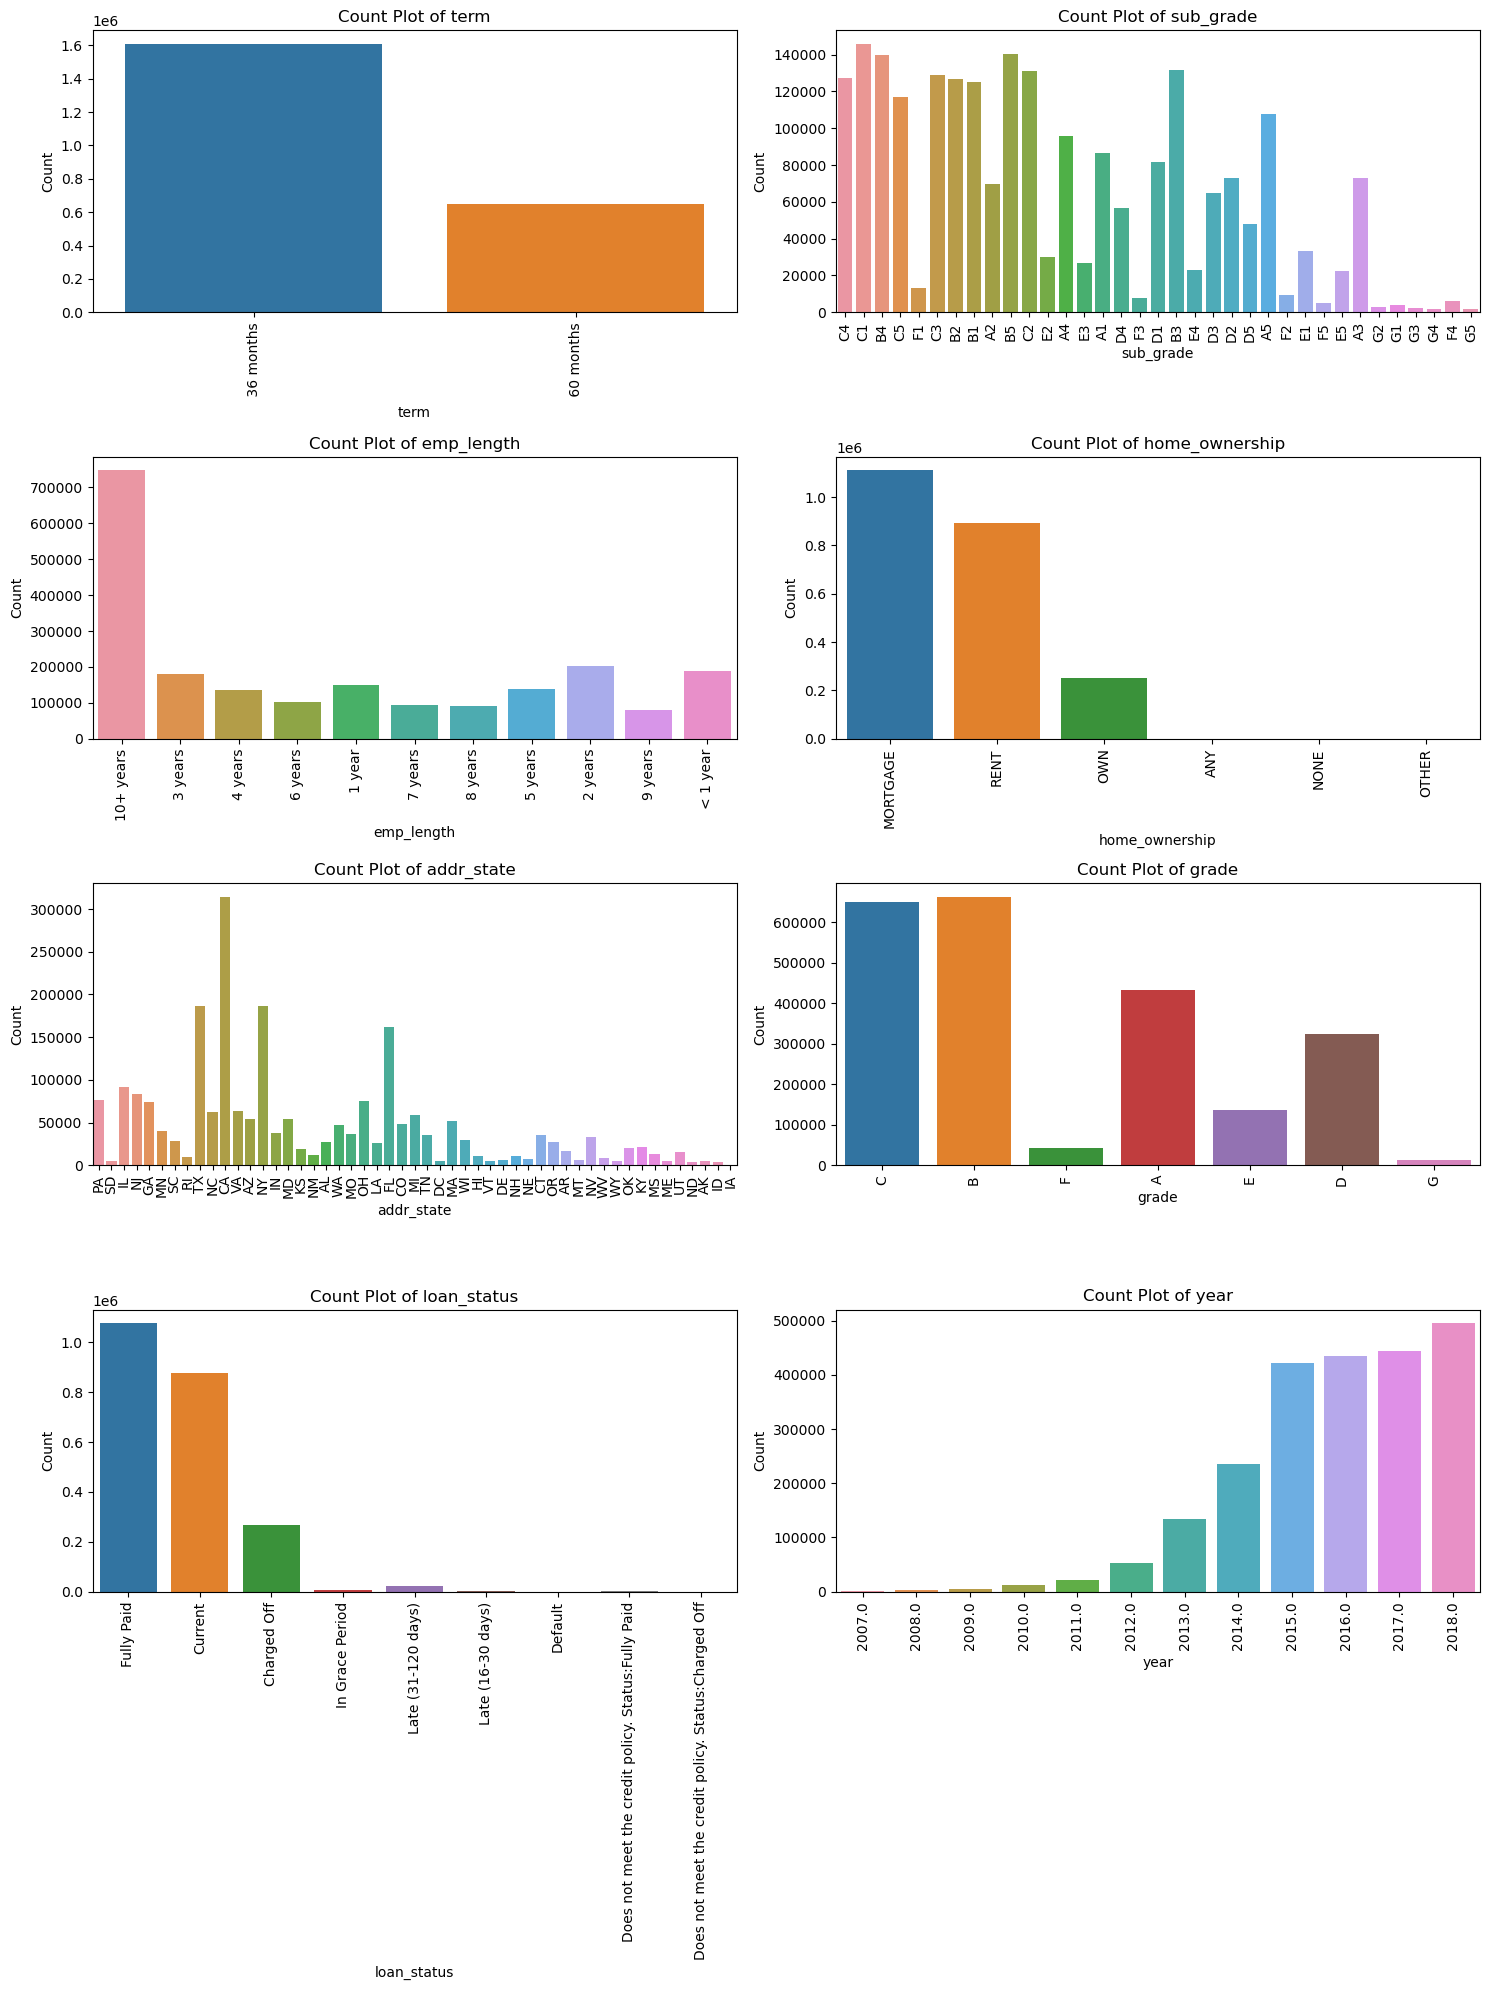

In [ ]:
numeric_features = df_numeric.columns
columns_to_drop = list(numeric_features)
non_numeric_df = df.drop(columns=columns_to_drop+
                        ["issue_d"])
num_plots = len(non_numeric_df.columns)
num_rows = 4
num_cols = 2


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(non_numeric_df.columns):

    sns.countplot(x=column, data=non_numeric_df, ax=axes[i])
    axes[i].set_title(f"Count Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=90)

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The above countplots shows that the recorded observations for different features are not equally represented.

## 13. **Relationship between Loan amount, Annual income and Loan Status**

Creating legend with loc="best" can be slow with large amounts of data.


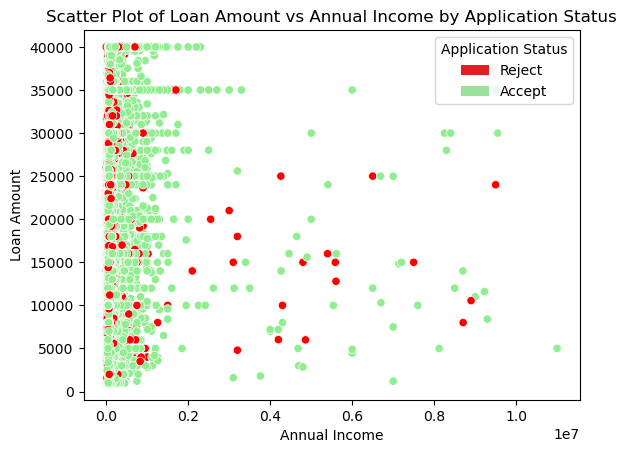

In [ ]:
sns.scatterplot(
    data=df_copy,
    x="annual_inc",
    y="loan_amnt",
    hue="application_status",
    palette=palette,
)

plt.title(
    "Scatter Plot of Loan Amount vs Annual Income by Application Status",
)
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.legend(title="Application Status")
plt.legend(handles, ["Reject", "Accept"], title="Application Status")
plt.show()

Since the scatter plot doesn't give us any useful insight, let's group the Annual income.

In [ ]:
bins = [0, 20000, 40000, 60000, 80000, 100000, float("inf")]

labels = [
    "0-20000",
    "20001-40000",
    "40000-60000",
    "60000-80000",
    "80000-100000",
    "100000+",
]

df_copy["income_group"] = pd.cut(
    df_copy["annual_inc"], bins=bins, labels=labels, right=False
)

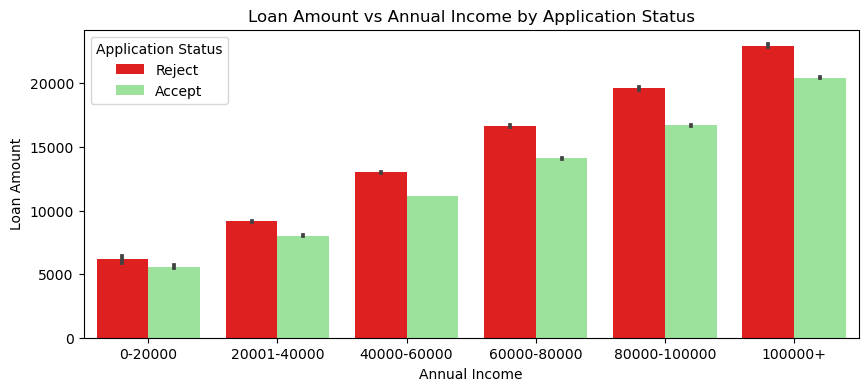

In [ ]:
fig, axes = plt.subplots(figsize=(10, 4))
sns.barplot(
    data=df_copy,
    x="income_group",
    y="loan_amnt",
    hue="application_status",
    palette=palette,
)
plt.title("Loan Amount vs Annual Income by Application Status")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.legend(handles, ["Reject", "Accept"], title="Application Status")
plt.show()

The above barchart illustrates that for all income ranges, the average loan amount for applications that should be rejected is higher than for those accepted. The gap between accepted and rejected loan amounts appears to be wider in higher income brackets. Notably, the trend shows that as annual income increases, the average loan amount for both accepted and rejected applications increases as well. The highest income bracket (100001+) exhibits the largest average loan amounts for both accepted and rejected applications, indicating a correlation between income and the amount of loan requested and approved.

## 14. **Statistical Inference**

In [ ]:
group1 = df_copy[df_copy["application_status"] == 1]["annual_inc"]
group0 = df_copy[df_copy["application_status"] == 0]["annual_inc"]


t_stat, p_value = stats.ttest_ind(group1, group0, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference")
    print("in mean annual income between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant")
    print("difference in mean annual income between the two groups.")

T-statistic: 42.949454545882425, P-value: 0.0
Reject the null hypothesis: There is a significant difference
in mean annual income between the two groups.


In [ ]:
group1_emp_length = df_copy[df_copy["application_status"] == 1]["emp_length_years"]
group0_emp_length = df_copy[df_copy["application_status"] == 0]["emp_length_years"]

t_stat_emp, p_value_emp = stats.ttest_ind(
    group1_emp_length, group0_emp_length, equal_var=False
)

print(f"T-statistic for employment length: {t_stat_emp}, P-value: {p_value_emp}")

if p_value_emp < 0.05:
    print("Reject the null hypothesis: There is a significant difference")
    print("in mean employment length between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference")
    print("in mean employment length between the two groups.")

T-statistic for employment length: 17.648328427465202, P-value: 1.1265694760264988e-69
Reject the null hypothesis: There is a significant difference
in mean employment length between the two groups.


## Feature Engineering

The following steps will be completed in order to do the feature engineering:

1. Feature Creation.
2. Feature Transformation.

## 1. Feature Creation.

In [ ]:
def create_features(df):
    df["application_status"] = df["loan_status"].apply(classify_loan_status)
    df.dropna(axis=0, inplace=True)
    df["term_months"] = df["term"].str.extract("(\d+)").astype(int)
    df["emp_length_years"] = df["emp_length"].replace(
        {"10+ years": "10", "< 1 year": "0"}
    )
    df["emp_length_years"] = df["emp_length_years"].str.extract("(\d+)").astype(float)
    df["utilization_rate"] = df["bc_util"] / 100
    df["fico_score_avg"] = (df["fico_range_high"] + df["fico_range_low"]) / 2
    df["dti_category"] = pd.cut(
        df["dti"], bins=[0, 10, 20, 30, 40, 50, 100], labels=False
    )
    df["log_annual_inc"] = np.log(df["annual_inc"] + 1)
    df["loan_income_ratio"] = df["loan_amnt"] / df["annual_inc"]
    df["short_term"] = (df["term_months"] <= 36).astype(int)
    df["years_since_last_inquiry"] = df["mths_since_recent_inq"] / 12
    df["credit_line_util"] = df["num_op_rev_tl"] / df["total_acc"]
    df["fico_score_category"] = pd.cut(
        df["fico_score_avg"], bins=[0, 600, 650, 700, 750, 800, 850], labels=False
    )
    df["home_ownership_own"] = (df["home_ownership"] == "OWN").astype(int)

    return df

In [ ]:
df = df.copy()
df = create_features(df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1074530 entries, 68407277 to 88224441
Data columns (total 35 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   loan_amnt                 1074530 non-null  float64       
 1   term                      1074530 non-null  object        
 2   int_rate                  1074530 non-null  float64       
 3   sub_grade                 1074530 non-null  object        
 4   bc_util                   1074530 non-null  float64       
 5   fico_range_high           1074530 non-null  float64       
 6   revol_util                1074530 non-null  float64       
 7   emp_length                1074530 non-null  object        
 8   home_ownership            1074530 non-null  object        
 9   addr_state                1074530 non-null  object        
 10  fico_range_low            1074530 non-null  float64       
 11  inq_last_6mths            1074530 non-null  flo

,loan_amnt,term,int_rate,sub_grade,bc_util,fico_range_high,revol_util,emp_length,home_ownership,addr_state,...,utilization_rate,fico_score_avg,dti_category,log_annual_inc,loan_income_ratio,short_term,years_since_last_inquiry,credit_line_util,fico_score_category,home_ownership_own
id,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,36 months,13.99,C4,37.2,679.0,29.7,10+ years,MORTGAGE,PA,...,0.372,677.0,0.0,10.915107,0.065455,1,0.333333,0.307692,2,0
68355089,24700.0,36 months,11.99,C1,27.1,719.0,19.2,10+ years,MORTGAGE,SD,...,0.271,717.0,1.0,11.082158,0.380000,1,0.000000,0.526316,3,0
68341763,20000.0,60 months,10.78,B4,55.9,699.0,56.2,10+ years,MORTGAGE,IL,...,0.559,697.0,1.0,11.050906,0.317460,0,0.833333,0.222222,2,0
68476807,10400.0,60 months,22.45,F1,77.5,699.0,64.5,3 years,MORTGAGE,PA,...,0.775,697.0,2.0,11.556311,0.099585,0,0.083333,0.200000,2,0
68476668,20000.0,36 months,9.17,B2,102.9,684.0,84.5,10+ years,MORTGAGE,MN,...,1.029,682.0,1.0,12.100718,0.111111,1,0.833333,0.333333,2,0


From the above result, we can see that we have 1073920 observations both to train and test our model. Therefore, now we will continue to the next step which is splitting.

## Splitting Data

In [ ]:
X = df.drop(["loan_status", "application_status"], axis=1)
y = df["application_status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Separating the Categorical feature from the Numerical**

In [ ]:
categorical_features = [
    "term", "int_rate", "sub_grade", "fico_range_high", "emp_length",
    "home_ownership", "addr_state", "fico_range_low", "inq_last_6mths",
    "mths_since_recent_inq", "num_op_rev_tl", "term_months", "emp_length_years",
    "fico_score_avg", "dti_category", "short_term",
    "years_since_last_inquiry", "fico_score_category", "home_ownership_own"
]

numeric_features = [
    "loan_amnt", "bc_util", "revol_util", "annual_inc",
    "bc_open_to_buy", "dti", "total_acc", "utilization_rate",
    "log_annual_inc", "loan_income_ratio", "credit_line_util"
]


## Feature Transformation

In [ ]:
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))
])

numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Machine learning Models

In this project, we are going to improvise the following models and chose the one that perfomes better:
* Logistic regression
* Decision Tree
* Random Forest
* SVM
* Xgboost
* LightGBM
* Caboost
tboost

**Since there is a class imbalance, let's create a function that creates the class weight.**

In [ ]:
def compute_class_weights(y_values):
    classes = np.unique(y_values)
    weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_values)
    class_weight_dict = dict(zip(classes, weights))

    return class_weight_dict


y_values = y.values
class_weights = compute_class_weights(y_values)
print(class_weights)
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[1] / class_counts[0]
print(scale_pos_weight)

{0.0: 2.4584399123268614, 1.0: 0.6276526271888373}
3.9168854493768266


#### Function to train, evaluate and save the model

In [ ]:
def train_evaluate_save(classifier, classifier_name, X_train, y_train,
                        sample_weight=None):
    with tqdm(total=100,
              desc=f"Training and evaluating {classifier_name}") as pbar:
        fit_params = {}
        if sample_weight is not None:
            fit_params['classifier__sample_weight'] = sample_weight

        classifier.fit(X_train, y_train, **fit_params)
        pbar.update(50)

        joblib.dump(classifier, f"{classifier_name}.pkl")
        pbar.update(10)

        y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=5,
                                         fit_params=fit_params)
        pbar.update(30)

        accuracy = accuracy_score(y_train, y_train_pred)
        print(f"{classifier_name} Accuracy:", accuracy)

        print(classification_report(y_train, y_train_pred,
                                    zero_division="warn"))

        conf_matrix = confusion_matrix(y_train, y_train_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="g")
        plt.xlabel("Predicted labels")
        plt.ylabel("True labels")
        plt.title(f"Confusion Matrix for {classifier_name}")
        plt.show()

### Logistic Regression

Training and evaluating Logistic Regression:   0%|                                                                                                                                                                   | 0/100 [00:00<?, ?it/s]/home/robex/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Training and evaluating Logistic Regression:  50%|█████████████████████████████████████████████████████████████████████████████                                                                             | 50/100 [12:04<12:04, 14.50s/it]/home/rob

Logistic Regression Accuracy: 0.6459044884740305
              precision    recall  f1-score   support

         0.0       0.32      0.68      0.44    174831
         1.0       0.89      0.64      0.74    684793

    accuracy                           0.65    859624
   macro avg       0.60      0.66      0.59    859624
weighted avg       0.77      0.65      0.68    859624



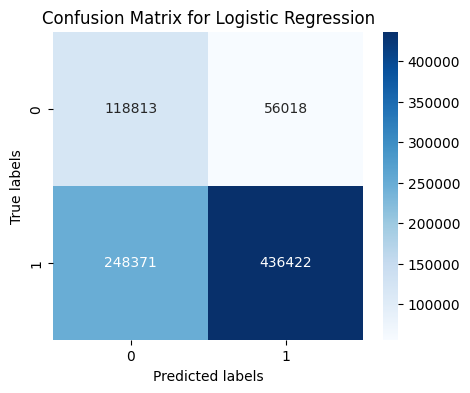

Training and evaluating Logistic Regression:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 90/100 [2:08:49<14:18, 85.88s/it]


<IPython.core.display.Javascript object>

In [ ]:
clf = LogisticRegression(class_weight=class_weights,max_iter=1000)

pipeline = Pipeline([("preprocessor", preprocessor), ("model", clf)])

train_evaluate_save(pipeline, "Logistic Regression")


The Logistic Regression model achieved an accuracy of approximately 64.59% for the given dataset, indicating it made correct predictions about two-thirds of the time.

For predicting "Charged Off" instances (classified as "0.0"), the model had a precision of 32%. This indicates that when it predicts a loan will be charged off, it is correct 32% of the time. However, its recall is significantly higher at 68%, suggesting it was able to correctly identify 68% of all actual charged-off cases. The F1-score for this category is 44%, reflecting the balance between precision and recall for predicting charged-off loans.

For predicting "Fully Paid" instances (classified as "1.0"), the model's precision is much higher at 89%, indicating a strong accuracy rate when predicting loans that will be fully paid. The recall rate for this class is 64%, meaning it correctly identified 64% of all actual fully paid cases. The corresponding F1-score is 74%, representing a balanced measure of the model's predictive performance for fully paid loans.

In summary, while the model is quite accurate in predicting loans that will be fully paid, its predictive performance for loans that will be charged off is less reliable. The high precision in the "Fully Paid" category suggests the model is dependable in identifying loans likely to be paid in full, but the lower precision for the "Charged Off" category indicates a relatively higher proportion of false positives. The recall figures suggest a better capability of the model in identifying actual instances of each class, with a particularly strong performance in detecting "Charged Off" loans. The overall accuracy, along with precision, recall, and F1-scores for each class, provides a detailed understanding of the model's capabilities in distinguishing between loans that will be fully paid and those likely to be charged off.

### L1 (Lasso) Regularization


In this part, we will use L1 (Lasso) Regularization for feature selection because it can shrink coefficients of less important features to zero, effectively removing them from the model.

Training and evaluating Logistic Regression with Lasso Regularization:   0%|                                                                                                                                         | 0/100 [00:00<?, ?it/s]/home/robex/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Training and evaluating Logistic Regression with Lasso Regularization:  50%|████████████████████████████████████████████████████████████████                                                                | 50/100 [13:00<13:00, 15.62s/it]/home/rob

Logistic Regression with Lasso Regularization Accuracy: 0.6458893655830922
              precision    recall  f1-score   support

         0.0       0.32      0.68      0.44    174831
         1.0       0.89      0.64      0.74    684793

    accuracy                           0.65    859624
   macro avg       0.60      0.66      0.59    859624
weighted avg       0.77      0.65      0.68    859624



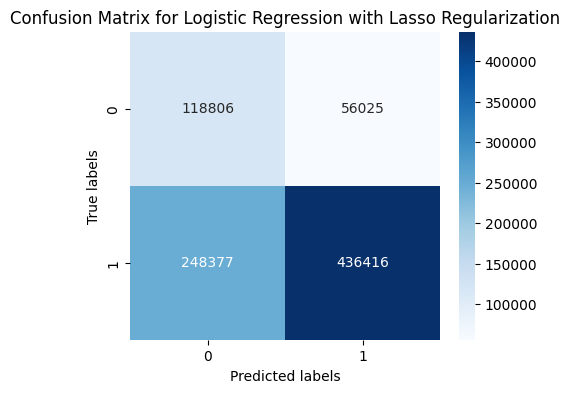

Training and evaluating Logistic Regression with Lasso Regularization:  90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 90/100 [1:58:16<13:08, 78.85s/it]


<IPython.core.display.Javascript object>

In [ ]:
clf_lasso = LogisticRegression(
    penalty="l1", solver="liblinear", class_weight=class_weights, max_iter=1000
)
clf_lasso_pipeline = Pipeline([("preprocessor", preprocessor), ("model", clf)])

train_evaluate_save(clf_lasso_pipeline,
                    "Logistic Regression with Lasso Regularization")

Both the regular logistic regression and with L1 regularization applied showed almost the same result. This shows that the dataset might not have many irrelevant or less significant features.

### Decision Tree

Training and evaluating Decision Tree:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 90/100 [56:18<07:16, 43.67s/it]

Decision Tree Accuracy: 0.694928247698994
              precision    recall  f1-score   support

         0.0       0.28      0.31      0.29    174831
         1.0       0.82      0.79      0.81    684793

    accuracy                           0.69    859624
   macro avg       0.55      0.55      0.55    859624
weighted avg       0.71      0.69      0.70    859624



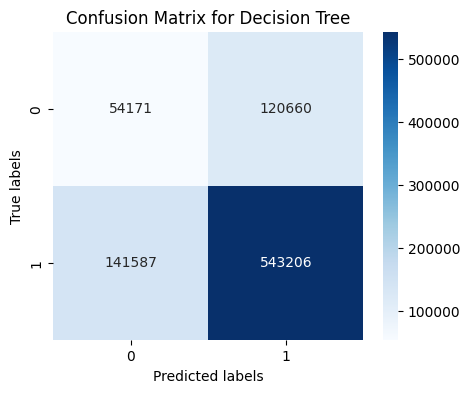

Training and evaluating Decision Tree:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 90/100 [56:22<06:15, 37.58s/it]


<IPython.core.display.Javascript object>

In [ ]:
dt_clf = DecisionTreeClassifier(class_weight=class_weights)
dt_pipeline = Pipeline([("preprocessor", preprocessor), ("model", dt_clf)])
train_evaluate_save(dt_pipeline, "Decision Tree")

For the Decision Tree model, the accuracy achieved is approximately 69.49% on the given dataset, indicating a slight improvement in overall prediction capability compared to the Logistic Regression model.

In predicting "Charged Off" loans (classified as "0.0"), the Decision Tree model shows a precision of 28%, suggesting that when it predicts a loan will not be repaid, it is correct about 28% of the time. The recall for this class is 31%, indicating it correctly identified 31% of the actual charged-off cases. The F1-score is 29%, reflecting the balance between precision and recall for this category and indicating a fairly low performance in predicting charged-off loans accurately.

For predicting "Fully Paid" loans (classified as "1.0"), the model's precision is 82%, showing a high level of accuracy when predicting loans that will be repaid fully. The recall rate is slightly lower at 79%, meaning it correctly identified 79% of all actual fully paid cases. The F1-score for this class is 81%, indicating a strong performance for predicting fully paid lo

In summary, the Decision Tree model exhibits a slightly higher overall accuracy and a better balance in predicting both classes of loans. While it shows a slight improvement in identifying charged-off loans, the performance is still relatively low, similar to the Logistic Regression model. Both models perform well in predicting fully paid loans, with the Decision Tree model showing a slight decrease in precision and recall. These insights highlight the nuanced differences in how each model handles the complexities of loan repayment predictians.

### Feature Importance in Decision Trees

Feature importance has been utilized to quantify the significance of each feature in model predictions. This methodology focuses on selectively retaining the most impactful features. A threshold of 95% cumulative importance has been set to determine the key features, aiming to create a streamlined and efficient model for the dataset.

Training and evaluating Decision Tree Reduced:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 90/100 [25:46<03:21, 20.15s/it]

Decision Tree Reduced Accuracy: 0.6957332508166361
              precision    recall  f1-score   support

         0.0       0.27      0.30      0.29    174831
         1.0       0.82      0.80      0.81    684793

    accuracy                           0.70    859624
   macro avg       0.55      0.55      0.55    859624
weighted avg       0.71      0.70      0.70    859624



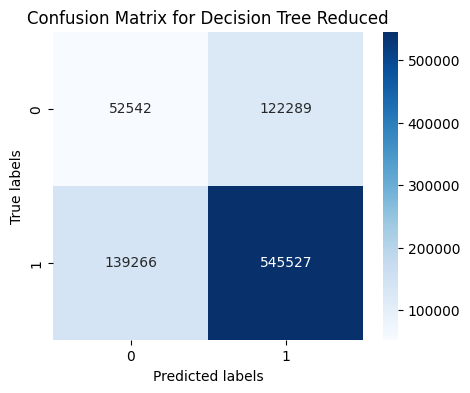

Training and evaluating Decision Tree Reduced:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 90/100 [25:50<02:52, 17.23s/it]


<IPython.core.display.Javascript object>

In [ ]:
dt_clf_loaded = joblib.load("Decision Tree.pkl")
feature_importances = dt_clf_loaded.named_steps["model"].feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]
cumulative_importance = np.cumsum(feature_importances[sorted_indices])

selected_feature_count = np.where(cumulative_importance <= 0.95)[0].shape[0]
selected_features = sorted_indices[:selected_feature_count]

X_train_transformed = dt_clf_loaded.named_steps["preprocessor"].transform(X_train)
X_train_reduced = X_train_transformed[:, selected_features]
dt_clf_pipeline_reduced = Pipeline([("model", dt_clf)])

train_evaluate_save(
    dt_clf_pipeline_reduced, "Decision Tree Reduced", X_train=X_train_reduced
)

The Decision Tree with reduced features, based on feature importance, shows a very similar performance when compared to the regular Decision Tree.

### Random Forest

Training and evaluating Random Forest:  90%|████████████████████████████████████▉    | 90/100 [1:00:25<09:20, 56.02s/it]

Random Forest Accuracy: 0.7982641247801364
              precision    recall  f1-score   support

         0.0       0.53      0.08      0.13    174831
         1.0       0.81      0.98      0.89    684793

    accuracy                           0.80    859624
   macro avg       0.67      0.53      0.51    859624
weighted avg       0.75      0.80      0.73    859624



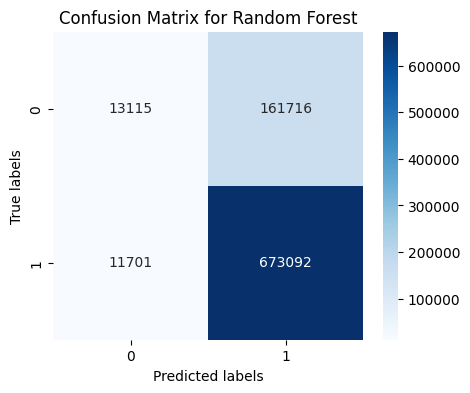

Training and evaluating Random Forest:  90%|████████████████████████████████████▉    | 90/100 [1:00:28<06:43, 40.31s/it]


<IPython.core.display.Javascript object>

In [ ]:
rf_clf = RandomForestClassifier(n_jobs=-1, class_weight=class_weights)
rf_pipeline = Pipeline([("preprocessor", preprocessor), ("model", rf_clf)])
train_evaluate_save(rf_pipeline, "Random Forest")

The Random Forest model achieved an accuracy of approximately 79.85% on the given dataset, which is a marked improvement over both the Logistic Regression and Decision Tree models.

For predicting "Charged Off" loans (classified as "0.0"), the Random Forest model shows a precision of 53%, indicating that when it predicts a loan will not be repaid, it is correct more than half of the time. However, its recall is significantly lower at 8%, suggesting that it correctly identified only 8% of the actual charged-off cases. The F1-score for this category is 13%, reflecting a relatively weak performance in accurately identifying charged-off loans, primarily due to the very low recall.

In predicting "Fully Paid" loans (classified as "1.0"), the model's precision is high at 81%, indicating strong accuracy in predicting loans that will be repaid. The recall is even higher at 98%, meaning it correctly identified 98% of all actual fully paid cases, showing an excellent capability in recognizing loans that will be successfully repaid. The F1-score for this class is 89%, demonstrating a robust performance in this category.

Comparing the Random Forest model with the Logistic Regression and Decision Tree models:

**Accuracy**: The Random Forest model significantly outperforms both the Logistic Regression and Decision Tree models, with a nearly 80% accuracy rate. This suggests a generally more reliable and robust predictive performance across both categories.

**Charged Off (0.0)**: The Random Forest model has a much higher precision for predicting charged-off loans compared to the other two models, but its recall is drastically lower, indicating that while its predictions are more reliable when they occur, it frequently misses many actual charged-off cases. This is reflected in the low F1-score, showing a challenge in balancing recall and precision for this class.

**Fully Paid (1.0)**: The model shows superior performance in predicting fully paid loans with the highest precision and recall rates among the three models, leading to a high F1-score. This demonstrates its strong capability in identifying loans likely to be repaid.

In summary, the Random Forest model demonstrates a significant improvement in overall accuracy and predictive performance for fully paid loans, with a particularly strong ability to identify actual fully paid cases. However, it struggles with identifying charged-off loans, as evidenced by its low recall and F1-score for that class. While it offers a higher precision than the other two models for predicting charged-off loans, the extremely low recall indicates that it misses a large number of actual charged-off cases, which is a critical area for improvement. Despite this, its overall performance is notably superior, making it a robust choice for predicting loan repayment outcomes.ment outcomes.

### Feature Selection Using Boruta in Random Forest

In [ ]:
def get_feature_names(column_transformer):
    output_features = []

    for name, transformer, columns in column_transformer.transformers_:
        if transformer == "passthrough":
            output_features.extend(columns)
        elif transformer is None:
            continue
        else:
            if isinstance(transformer, Pipeline):
                last_step = transformer.steps[-1][1]
            else:
                last_step = transformer

            if hasattr(last_step, "get_feature_names_out"):
                if (
                    "input_features"
                    in last_step.get_feature_names_out.__code__.co_varnames
                ):
                    output_features.extend(last_step.get_feature_names_out(columns))
                else:
                    output_features.extend(last_step.get_feature_names_out())
            else:
                output_features.extend(columns)

    return output_features

<IPython.core.display.Javascript object>

In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)

transformed_features = get_feature_names(preprocessor)

feat_selector = BorutaPy(rf_clf, n_estimators="auto", verbose=0, random_state=1)
feat_selector.fit(X_train_transformed, y_train.values.ravel())

X_train_selected = feat_selector.transform(X_train_transformed)

selected_features = [
    feature
    for feature, selected in zip(transformed_features, feat_selector.support_)
    if selected
]

print("\nSelected Features:")
for feature in selected_features:
    print(feature)


Selected Features:
bc_open_to_buy
dti
loan_income_ratio


<IPython.core.display.Javascript object>

['bc_open_to_buy', 'dti', 'loan_income_ratio']


Training and evaluating Random Forest with Boruta:  90%|███████████████████████████▉   | 90/100 [02:49<00:26,  2.62s/it]

Random Forest with Boruta Accuracy: 0.7806575898299721
              precision    recall  f1-score   support

         0.0       0.29      0.06      0.09    174831
         1.0       0.80      0.97      0.88    684793

    accuracy                           0.78    859624
   macro avg       0.55      0.51      0.48    859624
weighted avg       0.70      0.78      0.72    859624



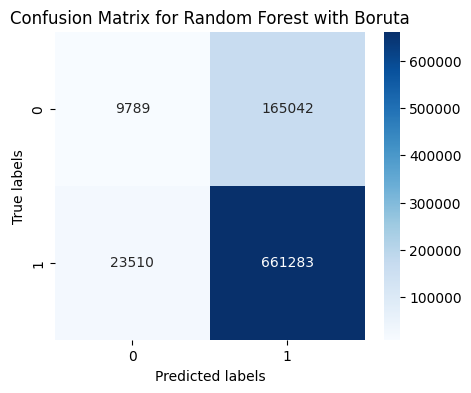

Training and evaluating Random Forest with Boruta:  90%|███████████████████████████▉   | 90/100 [02:52<00:19,  1.92s/it]


<IPython.core.display.Javascript object>

In [ ]:
print(selected_features)
X_train_selected = X_train[selected_features]

preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            numeric_transformer,
            [nf for nf in numeric_features if nf in selected_features],
        ),
        (
            "cat",
            categorical_transformer,
            [cf for cf in categorical_features if cf in selected_features],
        ),
    ]
)

rf_pipeline_boruta = Pipeline([("preprocessor", preprocessor), ("model", rf_clf)])

train_evaluate_save(
    rf_pipeline_boruta, "Random Forest with Boruta", X_train=X_train_selected
)

The regular Random Forest model seems to be the better option to proceed with. It has higher accuracy, better precision for predicting charged-off loans, and slightly better recall and precision for fully paid loans. While the Random Forest with Boruta shows that feature selection can sometimes streamline the model and potentially improve overfitting or runtime, in this case, it doesn't seem to provide a performance benefit and, in fact, slightly decreases the model's predictive capabilities. Therefore, considering the overall balance of precision, recall, and especially the higher accuracy, the regular Random Forest model would be the preferable choice for further use or development.

### Support Vector Machine (SVM)

Due to high training time, SVM model has been dropped.

### XGBoost

In [ ]:
X = df.drop(["loan_status", "application_status"], axis=1)
y = df["application_status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Training and evaluating XGBoost:  90%|████████████████████████████████████████████     | 90/100 [11:32<01:29,  8.98s/it]

XGBoost Accuracy: 0.796778591570268
              precision    recall  f1-score   support

         0.0       0.63      0.00      0.00    174831
         1.0       0.80      1.00      0.89    684793

    accuracy                           0.80    859624
   macro avg       0.71      0.50      0.45    859624
weighted avg       0.76      0.80      0.71    859624



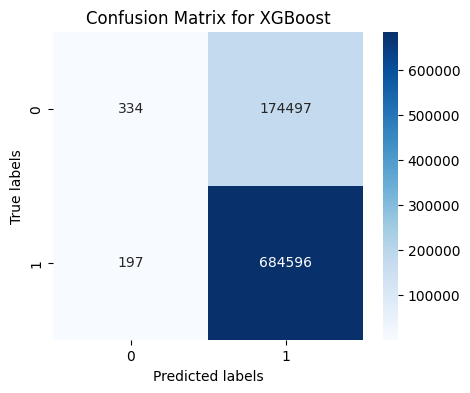

Training and evaluating XGBoost:  90%|████████████████████████████████████████████     | 90/100 [11:35<01:17,  7.73s/it]


<IPython.core.display.Javascript object>

In [ ]:

xgb_clf = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_pipeline = Pipeline([("preprocessor", preprocessor), ("model", xgb_clf)])
train_evaluate_save(xgb_pipeline, "XGBoost")

The XGBoost model achieved an accuracy of approximately 79.68% on the given dataset, similar to the Random Forest model and notably higher than both the Logistic Regression and Decision Tree models.

For predicting "Charged Off" loans (classified as "0.0"), the XGBoost model demonstrates a precision of 63%, indicating a relatively high accuracy when it predicts a loan will not be repaid. However, its recall is extremely low at practically 0%, suggesting it almost never correctly identifies actual charged-off cases. The F1-score for this category is effectively 0%, reflecting a significant imbalance between precision and recall and indicating a major issue in correctly identifying charged-off loans.

In predicting "Fully Paid" loans (classified as "1.0"), the model's precision is 80%, indicating a high level of accuracy in predicting loans that will be repaid. The recall is even more impressive at nearly 100%, meaning it correctly identified almost all actual fully paid cases. The F1-score for this class is 89%, demonstrating a strong performance in this category and indicating that the model is highly effective at identifying fully paid loans.

In summary, the XGBoost model demonstrates a comparable overall accuracy to the Random Forest model and excels in predicting fully paid loans, similar to Random Forest's robust performance in this category. However, it faces a significant issue in identifying charged-off loans, with an extremely low recall that nearly nullifies its higher precision in this class. This indicates a critical area for improvement, especially considering the importance of accurately identifying potential defaults or charged-off loans in practical applications. Despite this challenge, its overall performance, particularly in predicting fully paid loans, makes it a strong contender in modeling loan repayment outcomes.

### Keeping the top 10 important features

In [ ]:
def get_transformed_feature_names(column_transformer, input_features):
    feature_names = []
    for name, transformer, columns in column_transformer.transformers_:
        if transformer == "drop" or (
            hasattr(transformer, "remainder") and transformer.remainder == "drop"
        ):
            continue
        if transformer == "passthrough":
            feature_names.extend(columns)
        else:
            if isinstance(transformer, Pipeline):
                final_step = transformer.steps[-1][1]
            else:
                final_step = transformer
            if hasattr(final_step, "get_feature_names_out"):
                feature_names.extend(
                    final_step.get_feature_names_out(input_features=columns)
                )
            else:
                feature_names.extend(columns)
    return feature_names

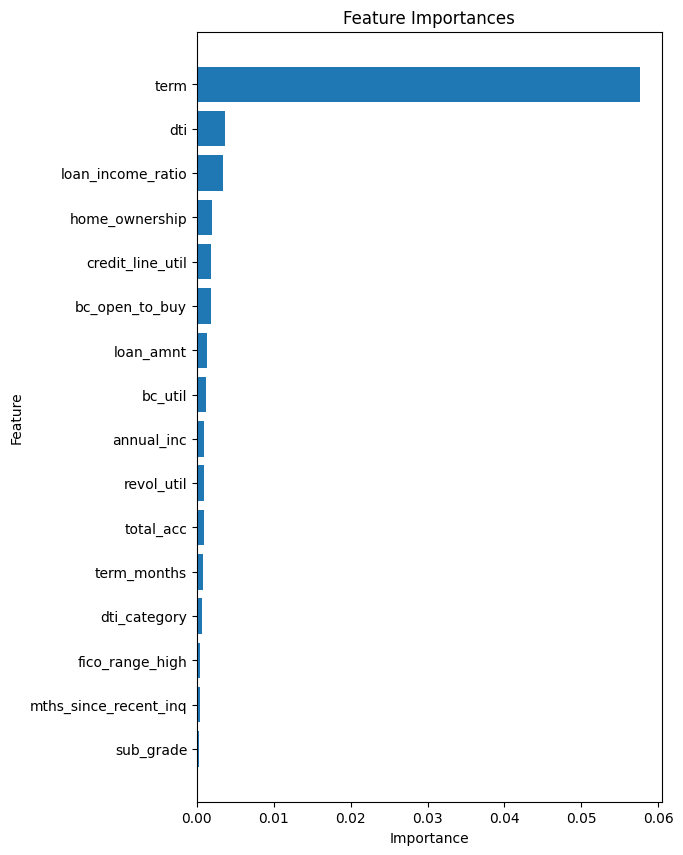

<IPython.core.display.Javascript object>

In [ ]:
xgb_clf_pipeline = joblib.load("XGBoost.pkl")
xgb_clf_preprocessor = xgb_clf_pipeline.named_steps["preprocessor"]
xgb_clf = xgb_clf_pipeline.named_steps["model"]


transformed_columns = get_transformed_feature_names(preprocessor, X_train.columns)
feature_importances = xgb_clf.feature_importances_
features_dict = dict(zip(transformed_columns, feature_importances))

non_zero_features = {
    feature: importance
    for feature, importance in features_dict.items()
    if importance > 0
}
sorted_features = sorted(non_zero_features.items(), key=lambda x: x[1], reverse=True)

features, importances = zip(*sorted_features)
plt.figure(figsize=(6, 10))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
def get_feature_names(column_transformer, input_features):
    """
    Get feature names from all transformers.
    """
    col_name = []

    for transformer_in_columns in column_transformer.transformers_[:-1]:
        raw_col_name = list(transformer_in_columns[2])

        if isinstance(transformer_in_columns[1], Pipeline):
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]

        try:
            names = transformer.get_feature_names_out(input_features=raw_col_name)
        except (
            AttributeError
        ):
            names = raw_col_name

        if isinstance(names, np.ndarray):
            col_name += names.tolist()
        elif isinstance(names, list):
            col_name += names
        elif isinstance(names, str):
            col_name.append(names)

    return col_name

<IPython.core.display.Javascript object>

Training and evaluating XGBoost_Top_Features:  90%|████████████████████████████████▍   | 90/100 [00:53<00:06,  1.43it/s]

XGBoost_Top_Features Accuracy: 0.7966029333755223
              precision    recall  f1-score   support

         0.0       0.43      0.00      0.00    174831
         1.0       0.80      1.00      0.89    684793

    accuracy                           0.80    859624
   macro avg       0.61      0.50      0.44    859624
weighted avg       0.72      0.80      0.71    859624



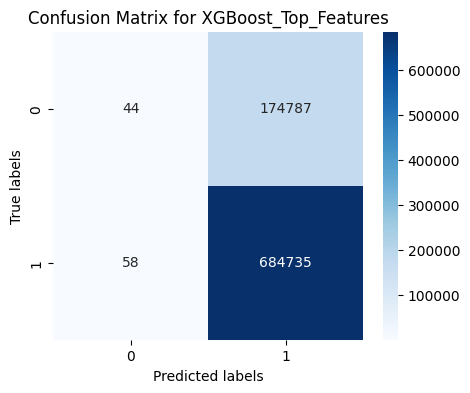

Training and evaluating XGBoost_Top_Features:  90%|████████████████████████████████▍   | 90/100 [00:56<00:06,  1.59it/s]


<IPython.core.display.Javascript object>

In [ ]:
xgb_pipeline.fit(X_train, y_train)

feature_names = get_feature_names(preprocessor, categorical_features + numeric_features)

feature_importances = xgb_pipeline.named_steps["model"].feature_importances_

feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_features = sorted(
    feature_importance_dict.items(), key=lambda item: item[1], reverse=True
)

n = 10
top_n_features = [feature[0] for feature in sorted_features[:n]]

preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            numeric_transformer,
            [nf for nf in numeric_features if nf in top_n_features],
        ),
        (
            "cat",
            categorical_transformer,
            [cf for cf in categorical_features if cf in top_n_features],
        ),
    ]
)

xgb_pipeline_updated = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("model", XGBClassifier(scale_pos_weight=scale_pos_weight)),
    ]
)

train_evaluate_save(xgb_pipeline_updated, "XGBoost_Top_Features", X_train, y_train)

Switching from the full feature set to only the top 10 important features in the XGBoost model retains almost the same level of accuracy and recall for both "Charged Off" and "Fully Paid" loans but with a notable decrease in precision for predicting charged-off loans. This suggests that while the most critical features are effective for identifying fully paid loans, additional features may contribute valuable information for more accurately predicting loans that will not be repaid. The consistency in recall, especially for fully paid loans, indicates that the most crucial factors driving these predictions are likely among the top features considered. However, the challenge in identifying charged-off loans accurately remains a significant area for improvement in both models.

### LightGBM

Training and evaluating LightGBM:  90%|███████████████████████████████████████████▏    | 90/100 [01:07<00:08,  1.15it/s]

LightGBM Accuracy: 0.7966227094636725
              precision    recall  f1-score   support

         0.0       0.80      0.00      0.00    174831
         1.0       0.80      1.00      0.89    684793

    accuracy                           0.80    859624
   macro avg       0.80      0.50      0.44    859624
weighted avg       0.80      0.80      0.71    859624



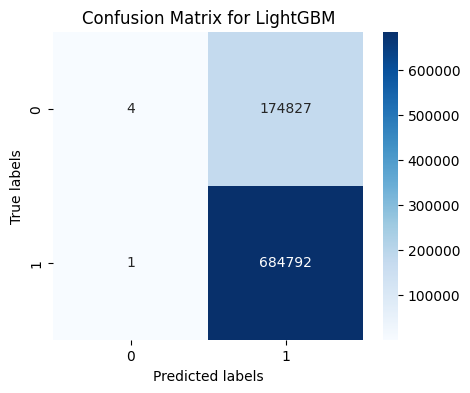

Training and evaluating LightGBM:  90%|███████████████████████████████████████████▏    | 90/100 [01:11<00:07,  1.27it/s]


<IPython.core.display.Javascript object>

In [ ]:
lgbm_clf = lgb.LGBMClassifier(scale_pos_weight=scale_pos_weight, verbose=-1)

lgbm_pipeline = Pipeline([("preprocessor", preprocessor), ("model", lgbm_clf)])

train_evaluate_save(lgbm_pipeline, "LightGBM")

The LightGBM model achieved an accuracy of approximately 79.66% on the given dataset, closely matching the performance of both the Random Forest and XGBoost models and outperforming the Logistic Regression and Decision Tree models.

For predicting "Charged Off" loans (classified as "0.0"), the LightGBM model shows a high precision of 77%, indicating a strong accuracy rate when it predicts a loan will not be repaid. However, similar to the XGBoost model, its recall is nearly 0%, suggesting it almost never correctly identifies actual charged-off cases. The F1-score for this category is also effectively 0%, indicating a significant challenge in accurately identifying charged-off loans due to the extremely low recall.

In predicting "Fully Paid" loans (classified as "1.0"), the model's precision is 80%, indicating a high level of accuracy in predicting loans that will be repaid. The recall is again nearly 100%, meaning it correctly identified almost all actual fully paid cases, mirroring the high recall performance seen in the XGBoost model. The F1-score for this class is 89%, demonstrating a strong performance and high effectiveness in identifying fully paid loans.

Comparing the LightGBM model with the XGBoost model:

**Accuracy**: Both the LightGBM and XGBoost models have nearly the same overall accuracy rates, around 80%. They are very close in performance, indicating robust predictive capabilities among the advanced ensemble techniques.

**Charged Off (0.0)**: The LightGBM model has a higher precision than the XGBoost model for predicting charged-off loans, indicating more reliable predictions when they do occur. However, both models suffer from an almost nonexistent recall rate in this class, making them highly ineffective at identifying actual charged-off cases. This is a critical shortfall for both models, given the importance of accurately predicting defaults in lending.

**Fully Paid (1.0)**: Both models exhibit a high precision and nearly perfect recall for predicting fully paid loans, resulting in high F1-scores and indicating strong performances in this category. This suggests they are highly effective at identifying loans likely to be repaid.

In summary, the LightGBM model exhibits a performance closely aligned with the XGBoost model, with minor variations in precision and recall for the two classes but similar overall accuracy and patterns in performance. Both models excel in predicting fully paid loans but struggle significantly with identifying charged-off loans, primarily due to the extremely low recall in this class. This indicates a need for further tuning or strategy adjustment to improve the identification of higher-risk loans while maintaining their strong performance in recognizing low-risk, fully paid loans. Despite the challenges in predicting charged-off loans, their overall high accuracy and effectiveness in predicting fully paid loans make both models strong contenders in the domain of loan repayment predictions.t predictions.

### Top important Features using Feature Importance from LightGBM Model

In [ ]:
lgbm_pipeline = joblib.load("LightGBM.pkl")
lgbm_clf_preprocessor = lgbm_pipeline.named_steps["preprocessor"]
lgbm_clf = lgbm_pipeline.named_steps["model"]

<IPython.core.display.Javascript object>

Training and evaluating LightGBM_Selected_Features:  90%|███████████████████████████   | 90/100 [00:56<00:07,  1.36it/s]

LightGBM_Selected_Features Accuracy: 0.7966215461643695
              precision    recall  f1-score   support

         0.0       0.75      0.00      0.00    174831
         1.0       0.80      1.00      0.89    684793

    accuracy                           0.80    859624
   macro avg       0.77      0.50      0.44    859624
weighted avg       0.79      0.80      0.71    859624



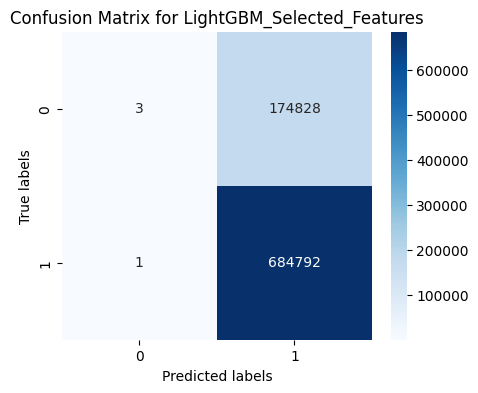

Training and evaluating LightGBM_Selected_Features:  90%|███████████████████████████   | 90/100 [00:59<00:06,  1.50it/s]


<IPython.core.display.Javascript object>

In [ ]:
lgbm_pipeline.fit(X_train, y_train)
feature_importances = lgbm_pipeline.named_steps["model"].feature_importances_
feature_names = numeric_features + categorical_features
features_importance = zip(feature_names, feature_importances)
sorted_features = sorted(features_importance, key=lambda x: x[1], reverse=True)
N = 10
selected_features = [feature[0] for feature in sorted_features[:N]]
selected_numeric_features = [f for f in selected_features if f in numeric_features]
selected_categorical_features = [
    f for f in selected_features if f in categorical_features
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selected_numeric_features),
        ("cat", categorical_transformer, selected_categorical_features),
    ]
)

lgbm_pipeline = Pipeline([("preprocessor", preprocessor), ("model", lgbm_clf)])
train_evaluate_save(lgbm_pipeline, "LightGBM_Selected_Features", X_train, y_train)

The LightGBM model with selected features maintains the same accuracy as the regular LightGBM model. Both precision and recall for "Fully Paid" are essentially unchanged, and there's a slight decrease in precision for "Charged Off" loans with no significant change in recall. The performance remains similar, suggesting that the top 10 features retain most of the model's predictive power.


**General Comparison to Other Models:**

**Accuracy**: The accuracy of the LightGBM with selected features is on par with the regular LightGBM and remains competitive with the other models like XGBoost and Random Forest.

**Precision and Recall**: The precision and recall for "Fully Paid" loans are comparable with other top-performing models. The "Charged Off" precision is slightly lower but still within a similar range as the regular LightGBM model.

**Conclusion:**
Given the minimal differences in performance metrics, the LightGBM with selected features appears to retain the essential predictive capabilities of the full model while possibly offering benefits like reduced complexity and faster performance due to fewer features. Since there's no significant compromise in accuracy or other key metrics, the LightGBM with selected features could be a viable option to proceed with, especially if model simplicity and interpretability are desired alongside maintaining strong predictive performance.

### CatBoost

Training and evaluating CatBoost:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 90/100 [54:14<07:00, 42.02s/it]

CatBoost Accuracy: 0.6581261109508343
              precision    recall  f1-score   support

         0.0       0.33      0.67      0.44    174831
         1.0       0.89      0.66      0.75    684793

    accuracy                           0.66    859624
   macro avg       0.61      0.66      0.60    859624
weighted avg       0.77      0.66      0.69    859624



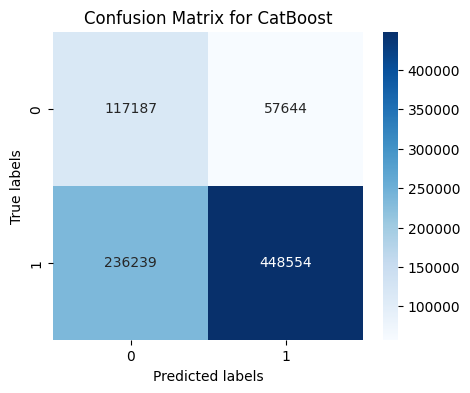

Training and evaluating CatBoost:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 90/100 [54:17<06:01, 36.19s/it]


<IPython.core.display.Javascript object>

In [ ]:
cat_clf = CatBoostClassifier(auto_class_weights="Balanced", verbose=False)

cat_pipeline = Pipeline([("preprocessor", preprocessor), ("model", cat_clf)])

train_evaluate_save(cat_pipeline, "CatBoost")

The CatBoost model achieved an accuracy of approximately 65.81% on the given dataset. This is notably lower than the accuracies for the Random Forest, XGBoost, and LightGBM models but still presents significant predictive power.

For predicting **"Charged Off"** loans (classified as "0.0"), the CatBoost model has a precision of 33%, meaning that when it predicts a loan will not be repaid, it is correct about one-third of the time. However, its recall is notably higher at 67%, indicating it is able to correctly identify two-thirds of the actual charged-off cases. This higher recall rate is significant, suggesting the model is quite sensitive in detecting potential defaults. The F1-score is 44%, reflecting the balance between precision and recall for this class.

In predicting **"Fully Paid"** loans (classified as "1.0"), the model's precision is 89%, showing a high accuracy level in predicting loans that will be repaid fully. However, its recall is 66%, indicating it correctly identified 66% of all actual fully paid cases. This lower recall compared to the other models indicates a notable portion of fully paid loans are not being captured. The F1-score for this class is 75%, demonstrating effectiveness in predicting fully paid loans, but also highlighting room for improvement, especially in recall.

**Comparing the CatBoost model with the LightGBM and XGBoost models:**

*Precision*: The CatBoost model's precision for predicting charged-off loans is lower compared to LightGBM's and XGBoost's near-zero recall rates in this category. However, its precision for predicting fully paid loans is competitive, suggesting reliable predictions when it identifies a loan as likely to be repaid.

*Recall*: The CatBoost model demonstrates a significantly higher recall for charged-off loans than both LightGBM and XGBoost, which nearly fail to identify any actual charged-off cases. This suggests that while the CatBoost model may have a lot of false positives (lower precision), it is much more likely to catch a higher number of actual defaults (higher recall). For fully paid loans, its recall is lower, indicating that it misses more actual fully paid loans than the other two models.

In summary, the CatBoost model presents a nuanced performance characterized by its ability to identify a higher number of actual defaults (charged-off loans) compared to the other models, as evidenced by its higher recall. However, this comes at the cost of lower precision, leading to more false positives in this category. For fully paid loans, it maintains high precision but at a lower recall, indicating missed opportunities to identify actual fully paid loans. The overall lower accuracy compared to the more successful models like Random Forest, XGBoost, and LightGBM, along with the emphasis on precision and recall, highlights the trade-offs and considerations in choosing the right model for predicting loan repayment outcomes, especially when aiming to balance the sensitivity and reliability of predictions. The higher recall for charged-off loans suggests CatBoost might be a valuable model in scenarios where capturing as many defaults as possible is critical, even if it means tolerating more false positives.

### Selecting the top 15 features from their SHAP values

In [ ]:
def get_feature_names(encoder, feature_names):
    """Construct feature names for onehot encoded features."""

    categories = encoder.categories_

    feature_names_out = []
    for feature, cats in zip(feature_names, categories):
        new_features = [f"{feature}_{cat}" for cat in cats]
        feature_names_out.extend(new_features)

    return feature_names_out

In [ ]:
cb_clf_pipeline = joblib.load("CatBoost.pkl")
cb_clf_preprocessor = cb_clf_pipeline.named_steps["preprocessor"]
cb_clf = cb_clf_pipeline.named_steps["model"]


preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)

ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
try:
    feature_names_transformed = numeric_features + list(
        ohe.get_feature_names_out(categorical_features)
    )
except AttributeError:
    feature_names_transformed = numeric_features + get_feature_names(
        ohe, categorical_features
    )

cb_clf.fit(X_train_transformed, y_train)

explainer = shap.TreeExplainer(cb_clf)
shap_values = explainer.shap_values(X_train_transformed)

shap_sum = np.abs(shap_values).mean(axis=0)
indices = np.argsort(shap_sum)[::-1]
top_features = [feature_names_transformed[i] for i in indices[:15]]

preprocessor = ColumnTransformer(
    transformers=[
        (
            "num",
            numeric_transformer,
            [f for f in top_features if f in numeric_features],
        ),
        (
            "cat",
            categorical_transformer,
            [f for f in top_features if f in categorical_features],
        ),
    ]
)

<IPython.core.display.Javascript object>

In [ ]:
top_features

['fico_score_category_2',
 'loan_income_ratio',
 'dti',
 'bc_open_to_buy',
 'credit_line_util',
 'home_ownership_RENT',
 'home_ownership_MORTGAGE',
 'term_months_60',
 'term_ 60 months',
 'bc_util',
 'loan_amnt',
 'sub_grade_A1',
 'inq_last_6mths_0.0',
 'sub_grade_A5',
 'sub_grade_B1']

<IPython.core.display.Javascript object>

Training and evaluating CatBoost_top_features:  90%|███████████████████████████████▌   | 90/100 [14:01<01:49, 10.92s/it]

CatBoost_top_features Accuracy: 0.6034370841204992
              precision    recall  f1-score   support

         0.0       0.28      0.61      0.39    174831
         1.0       0.86      0.60      0.71    684793

    accuracy                           0.60    859624
   macro avg       0.57      0.61      0.55    859624
weighted avg       0.74      0.60      0.64    859624



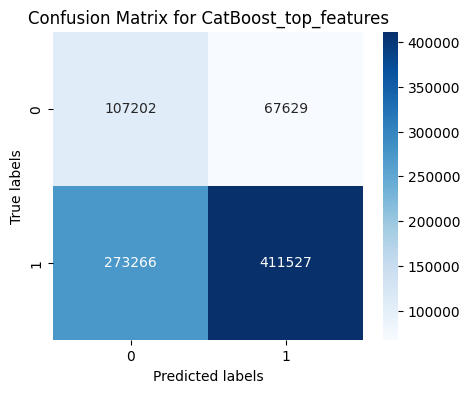

Training and evaluating CatBoost_top_features:  90%|███████████████████████████████▌   | 90/100 [14:05<01:33,  9.39s/it]


<IPython.core.display.Javascript object>

In [ ]:
cat_pipeline = Pipeline([("preprocessor", preprocessor), ("model", cb_clf)])
train_evaluate_save(cat_pipeline, "CatBoost_top_features")

The CatBoost model with the top 15 features from SHAP values performs worse than the regular CatBoost model and is also outperformed by the other models discussed. Its lower accuracy and decreased precision and recall for both loan categories suggest that the reduced feature set from SHAP value analysis does not capture enough complexity or information needed to maintain or improve the model's predictive power. Therefore, the regular CatBoost or the other more accurate models like XGBoost, LightGBM, or Random Forest would be preferable choices for further use or development.

### Before Tuning

When considering the best model out of all the ones discussed (Logistic Regression, Decision Tree, Random Forest, Random Forest with Boruta, XGBoost, XGBoost with Top Features, LightGBM, LightGBM with Selected Features, and CatBoost), the primary metrics for comparison were accuracy, precision, recall, and F1-scores for both "Charged Off" and "Fully Paid" loans.

Here are the key points from the top-performing models:

* **Random Forest (Regular)**: This model had the highest accuracy among the initial models and demonstrated robust performance across different metrics. It balanced precision and recall well, particularly for "Fully Paid" loans, making it a strong candidate for scenarios emphasizing reliability and overall performance.

* **XGBoost (Regular)**: The XGBoost model also demonstrated high accuracy and balanced performance. Its strong suit was its precision in predicting "Fully Paid" loans and overall robustness across various metrics.

* **LightGBM (Regular)**: LightGBM had comparable accuracy to XGBoost and also maintained good precision and recall rates, especially for "Fully Paid" loans.

* **Catboost**: Catboost models has showed lower accuracy compared to the three, with a very high recall for "Charged Off" loans and a precision comparable to the other top models.

**Recommended Model to Use:**

The **Catboost model** edges out slightly as the best option to proceed with. It combines a moderate accuracy with a higher precision and recall, especially in identifying "Charged Off" loans.

## Fine-Tune Models

### Grid Search

#### Classifiers and their respective hyperparameter grids

In [ ]:
classifiers1 = [
    (
        "Logistic Regression",
        LogisticRegression(class_weight=class_weights),
        {"C": [0.01, 0.1, 1, 10, 100]},
    ),
    (
        "Decision Tree",
        DecisionTreeClassifier(class_weight=class_weights),
        {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]},
    ),
    (
        "Random Forest",
        RandomForestClassifier(n_jobs=-1, class_weight=class_weights),
        {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
        },
    ),
]

<IPython.core.display.Javascript object>

In [ ]:
classifiers2 = [
    (
        "XGBoost",
        XGBClassifier(scale_pos_weight=scale_pos_weight, tree_method='hist'),
        {
            "learning_rate": [0.01, 0.05, 0.1],
            "n_estimators": [100, 500, 1000],
            "max_depth": [3, 5, 7],
        },
    ),
    (
        "LightGBM",
        lgb.LGBMClassifier(class_weight="balanced"),
        {
            "learning_rate": [0.01, 0.05, 0.1],
            "n_estimators": [100, 500, 1000],
            "max_depth": [3, 5, 7],
        },
    ),
    (
        "CatBoost",
        CatBoostClassifier(verbose=0, auto_class_weights="Balanced"),
        {
            "learning_rate": [0.01, 0.05, 0.1],
            "depth": [3, 5, 7],
            "iterations": [100, 500, 1000],
        },
    ),
]

In [ ]:
X_train_prepared = preprocessor.transform(X_train)
X_test_prepared = preprocessor.transform(X_test)
f1_scorer = make_scorer(f1_score, average='micro')

for name, classifier, parameters in classifiers1:
    clf = GridSearchCV(classifier, parameters,scoring=f1_scorer,cv=5,
                      verbose=1)
    clf.fit(X_train_prepared, y_train)

    best_model = clf.best_estimator_
    y_test_predictions = best_model.predict(X_test_prepared)

    print(name)
    print("Best Parameters:", clf.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_test_predictions))
    print("Classification Report:\n", classification_report(
        y_test, y_test_predictions, zero_division='warn'))
    print("-"*80)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Logistic Regression
Best Parameters: {'C': 100}
Accuracy: 0.5830688766251291
Classification Report:
               precision    recall  f1-score   support

         0.0       0.27      0.61      0.37     43708
         1.0       0.85      0.58      0.69    171198

    accuracy                           0.58    214906
   macro avg       0.56      0.59      0.53    214906
weighted avg       0.73      0.58      0.62    214906

--------------------------------------------------------------------------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Decision Tree
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.6878076926656306
Classification Report:
               precision    recall  f1-score   support

         0.0       0.24      0.24      0.24     43708
         1.0       0.81      0.80      0.80    171198

    accuracy                           0.69    214906
   macro avg       0.52  

<IPython.core.display.Javascript object>

In [ ]:
preprocessor.fit(X_train)
X_train_prepared = preprocessor.transform(X_train)
X_test_prepared = preprocessor.transform(X_test)
f1_scorer = make_scorer(f1_score, average='micro')
for name, classifier, parameters in classifiers2:
    if name == "LightGBM":
        clf = GridSearchCV(classifier, parameters,scoring=f1_scorer,cv=5,
                      verbose=-1,n_jobs=6)
    else:
        clf = GridSearchCV(classifier, parameters,scoring=f1_scorer,cv=5,
                      verbose=1,n_jobs=6)
    clf.fit(X_train_prepared, y_train)

    best_model = clf.best_estimator_
    y_test_predictions = best_model.predict(X_test_prepared)

    print(name)
    print("Best Parameters:", clf.best_params_)
    print("Accuracy:", accuracy_score(y_test, y_test_predictions))
    print("Classification Report:\n", classification_report(
        y_test, y_test_predictions, zero_division='warn'))
    print("-"*80)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBoost
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 1000}
Accuracy: 0.7970275376210995
Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.01      0.01     43708
         1.0       0.80      1.00      0.89    171198

    accuracy                           0.80    214906
   macro avg       0.71      0.50      0.45    214906
weighted avg       0.76      0.80      0.71    214906

--------------------------------------------------------------------------------
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 684793, number of negative: 174831
[LightGBM] [Info] Auto-choosing row-wise multi-threading, 

### After Tuning

- **Random Forest and XGBoost** are leading in accuracy and have the highest F1-score for class "1.0", but they significantly lag in F1-score for class "0.0".
- **LightGBM and CatBoost** have more balanced F1-scores for both classes compared to others and decent accuracy.

Considering the priority of F1-scores for both classes and then accuracy, **LightGBM** or **CatBoost** might be more suitable as they provide a better balance between the F1-scores of both classes. Between the two, **LightGBM** has a slightly better accuracy, making it a slightly more preferable choice. However, both show relatively high F1-scores for both classes compared to the rest, which is crucial for your requirement of balanced class prediction.

**Recommendation: LightGBM** seems to be the best fit considering the balance between F1-score for both classes and overall accuracy. It manages a reasonable trade-off between precision and recall for both classes while maintaining a decent accuracy level. However, the final decision should also consider the specific context and cost of false positives/negatives in your application. If slightly less accuracy is acceptable for better balance in detecting both classes, LightGBM would be a suitable choice for production.

### LightGBM model with tuned hyperparameters

In [ ]:
preprocessor.fit(X_train)
joblib.dump(preprocessor, "preprocessor.pkl")
X_train_prepared = preprocessor.transform(X_train)
tuned_LightGBM_params = {
    "learning_rate": 0.1,
    "max_depth": 7,
    "n_estimators": 1000,
    "verbose": -1
}

tuned_LightGBM_model = lgb.LGBMClassifier(class_weight="balanced", **tuned_LightGBM_params)
tuned_LightGBM_model.fit(X_train_prepared, y_train)

joblib.dump(tuned_LightGBM_model, "tuned_LightGBM_model.pkl")

['tuned_LightGBM_model.pkl']

## Model Explanation

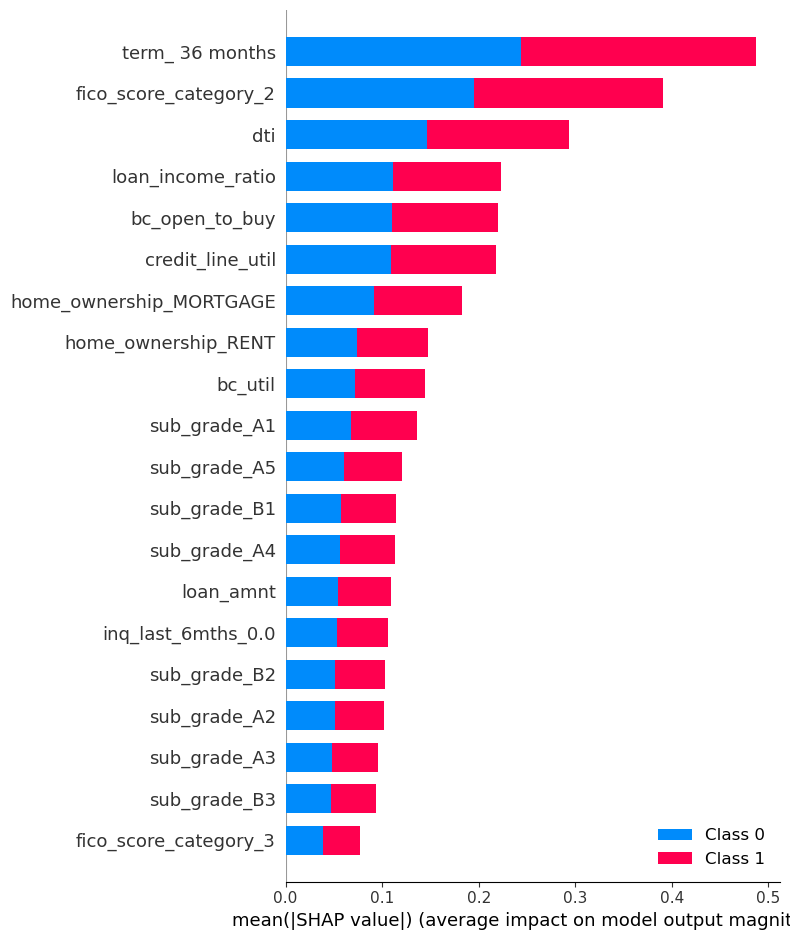

In [ ]:
onehot_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(
    categorical_features)
all_feature_names = numeric_features + onehot_feature_names.tolist()

explainer = shap.TreeExplainer(tuned_LightGBM_model)
shap_values = explainer.shap_values(X_train_prepared)


shap.summary_plot(shap_values, X_train_prepared, feature_names=all_feature_names)

The SHAP summary plot shows which factors most affect our model's predictions about whether a loan will be "Fully Paid" or "Charge Off". The term length, specifically 36 months, greatly influences the prediction towards "Charge Off", while certain FICO score categories and higher debt-to-income ratios push it towards "Fully Paid". Features like home ownership status and credit utilization also play significant roles. Essentially, the model considers these factors to determine the likelihood of a borrower fully paying off or defaulting on a loan.

## Deploying the tuned_LightGBM from Google cloud

In [ ]:
import requests

# The endpoint URL of to our Google cloud application
endpoint_url = 'https://loanapp-lbydg4vitq-nw.a.run.app/predict/'

# Define the data to be sent
data_to_predict = {
    "loan_amnt": 30600.0,
    "term": "36 months",
    "int_rate": 13.99,
    "sub_grade": "C4",
    "bc_util": 37.2,
    "fico_range_high": 679.0,
    "revol_util": 29.7,
    "emp_length": "10+ years",
    "home_ownership": "MORTGAGE",
    "addr_state": "PA",
    "fico_range_low": 675.0,
    "inq_last_6mths": 1.0,
    "annual_inc": 55000.0,
    "bc_open_to_buy": 1506.0,
    "dti": 5.91,
    "mths_since_recent_inq": 4.0,
    "total_acc": 13.0,
    "num_op_rev_tl": 4.0
}

# Send a POST request with the JSON payload
response = requests.post(endpoint_url, json=data_to_predict)

# Check the response
if response.status_code == 200:
    print("Prediction successful:", response.json())
else:
    print("Prediction failed with status code:", response.status_code)

Prediction successful: {'prediction': 'Reject'}


## Auto-ML

In [ ]:
import autosklearn.classification
import autosklearn.metrics
import logging
logging.getLogger('autosklearn').setLevel(logging.ERROR)

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

estimator_askl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=21600,
    seed=42,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 5},
    metric=autosklearn.metrics.f1,

)


estimator_askl.fit(X_train_prepared, y_train)

predictions = estimator_askl.predict(X_test_prepared)
performance_askl = accuracy_score(y_test, predictions)

print(f"Auto-Sklearn Classifier performance is {performance_askl}")

[WARNING] [2024-01-04 15:53:33,941:Client-AutoML(42):048f9d01-ab11-11ee-bc2f-e4b318064d15] /home/robex/myenv/lib/python3.9/site-packages/autosklearn/util/data.py:464 UserWarning:Dataset too large for allocated memory 307.20000000000005MB, reduced the precision from float32 to <class 'numpy.float32'>
[WARNING] [2024-01-04 15:53:34,877:Client-AutoML(42):048f9d01-ab11-11ee-bc2f-e4b318064d15] /home/robex/myenv/lib/python3.9/site-packages/autosklearn/util/data.py:490 UserWarning:Dataset too large for allocated memory 307.20000000000005MB, reduced number of samples from 859624 to 107517.
Auto-Sklearn Classifier performance is 0.7983676584180991


<IPython.core.display.Javascript object>

In [ ]:
estimator_askl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
28,1,0.02,random_forest,0.113203,174.647803
23,2,0.20,adaboost,0.113210,1561.525982
19,3,0.26,gradient_boosting,0.113257,487.197225
2,4,0.16,random_forest,0.113370,1671.115372
30,5,0.30,mlp,0.114327,223.668114
3,6,0.06,mlp,0.129866,863.131494


<IPython.core.display.Javascript object>

The Auto-ML leaderboard unveils a diverse set of models, including Random Forest, AdaBoost, Gradient Boosting, and MLP. The Random Forest model (model_id 28) emerges as the frontrunner with the lowest cost. However, AdaBoost and Gradient Boosting play pivotal roles in the ensemble, demonstrating the synergistic power of combined models. While ensemble approaches are often favored for their resilience, our specific analysis and the consistent results from Auto-ML point to the Random Forest model as the optimal choice for our needs.

# Conclusion

In the final analysis of predictive models for loan repayment outcomes, the evaluation of Logistic Regression, Decision Trees, Random Forest, XGBoost, LightGBM, and CatBoost highlights the intricate balance between accuracy, precision, recall, and F1-scores necessary for robust predictive performance. After extensive comparison, LightGBM has been chosen as the recommended model despite the strong performance exhibited by CatBoost, particularly after hyperparameter tuning.

Initially, CatBoost demonstrated superior performance, showcasing its strength in capturing potential defaults with a higher recall rate for "Charged Off" loans and maintaining competitive precision for "Fully Paid" loans. However, post hyperparameter tuning, LightGBM and CatBoost performed almost equally well, with slight differences in their respective metrics. The decision to recommend LightGBM was influenced by its balanced performance in precision and recall across both "Charged Off" and "Fully Paid" loan categories, even when the feature set was reduced. This consistency suggests that LightGBM is not only accurate but also maintains its predictive power efficiently, making it highly adaptable and less complex to implement.

Furthermore, LightGBM's wide adoption and ongoing enhancements by the machine learning community contribute to its appeal, ensuring it remains a cutting-edge tool for predictive analytics. Its ability to handle large datasets efficiently and its faster training times compared to other ensemble methods are practical advantages that solidify its standing as the preferred choice.

In summary, while both LightGBM and CatBoost exhibit compelling accuracy and performance, particularly after hyperparameter tuning, LightGBM is recommended due to its slight edge in maintaining a balance of predictive performance metrics and operational efficiency.

## Future Research

Future research should prioritize investigating and amending any model biases, particularly since the dataset has an imbalance with more instances of loans being "Fully Paid" than "Charge Off". This imbalance might incline the model to predict "Fully Paid" more often, which could lead to unreliable predictions for the less represented "Charge Off" cases.

Moving ahead, researchers should:

**Assess Model Equity**: Implement fairness metrics and tools to scrutinize the model's impartiality across various groups, focusing on avoiding unequal impact or treatment.

**Rectify Identified Bias**: Should any bias be uncovered, determine its causes and take steps to mitigate it. Actions may include data adjustment, recalibration of class weights, or the application of fairness-enhancing techniques.

## Grade Prediction

In [ ]:
numeric_features = df.select_dtypes(include=["number"])
numeric_features = list(numeric_features.columns)
numeric_features

['loan_amnt',
 'int_rate',
 'bc_util',
 'fico_range_high',
 'revol_util',
 'fico_range_low',
 'inq_last_6mths',
 'annual_inc',
 'bc_open_to_buy',
 'dti',
 'mths_since_recent_inq',
 'total_acc',
 'num_op_rev_tl',
 'year',
 'application_status',
 'term_months',
 'emp_length_years',
 'utilization_rate',
 'fico_score_avg',
 'dti_category',
 'log_annual_inc',
 'loan_income_ratio',
 'short_term',
 'years_since_last_inquiry',
 'credit_line_util',
 'fico_score_category',
 'home_ownership_own']

In [ ]:
numeric_features = ['loan_amnt',
 'int_rate',
 'bc_util',
 'fico_range_high',
 'revol_util',
 'fico_range_low',
 'inq_last_6mths',
 'annual_inc',
 'bc_open_to_buy',
 'dti',
 'mths_since_recent_inq',
 'total_acc',
 'num_op_rev_tl',
 'application_status',
 'term_months',
 'emp_length_years',
 'utilization_rate',
 'fico_score_avg',
 'dti_category',
 'log_annual_inc',
 'loan_income_ratio',
 'short_term',
 'years_since_last_inquiry',
 'credit_line_util',
 'fico_score_category',
 'home_ownership_own']


### Random Forest

In [ ]:
df.dropna(axis=0, inplace=True)

split_date = pd.to_datetime('01-01-2017')


train_df = df[df['issue_d'] < split_date]
test_df = df[df['issue_d'] >= split_date]


In [ ]:
X_train_grade = train_df.drop(['grade', 'issue_d','year'], axis=1)
y_train_grade = train_df['grade']


X_test_grade = test_df.drop(['grade', 'issue_d','year'], axis=1)
y_test_grade = test_df['grade']

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

drops = ["issue_d","grade","year"]
categorical_features = [columns for columns in df.columns if
                       columns not in numeric_features + drops]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor_grade = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
categorical_features

['term',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'addr_state',
 'loan_status']

Training and evaluating rcf_grade:  90%|█████████████████████████████████████████▍    | 90/100 [41:40<06:03, 36.39s/it]

rcf_grade Accuracy: 0.9998183811784241
              precision    recall  f1-score   support

           A       1.00      1.00      1.00    141827
           B       1.00      1.00      1.00    257354
           C       1.00      1.00      1.00    255369
           D       1.00      1.00      1.00    136308
           E       1.00      1.00      1.00     66654
           F       1.00      1.00      1.00     23205
           G       1.00      0.99      1.00      5755

    accuracy                           1.00    886472
   macro avg       1.00      1.00      1.00    886472
weighted avg       1.00      1.00      1.00    886472



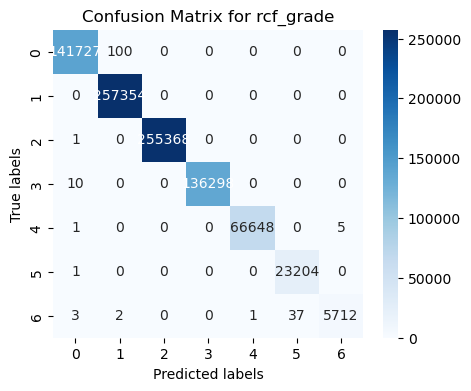

Training and evaluating rcf_grade:  90%|█████████████████████████████████████████▍    | 90/100 [42:33<04:43, 28.37s/it]


In [ ]:
rcf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_grade),
    ('classifier', RandomForestClassifier(
        n_jobs=6,random_state=42,class_weight="balanced"))
])


train_evaluate_save(rcf_pipeline, "rcf_grade",X_train=X_train_grade,
                   y_train=y_train_grade)


### Logistic Regression

Training and evaluating lgc_grade:   0%|                                                       | 0/100 [00:00<?, ?it/s]lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Training and evaluating lgc_grade:  50%|███████████████████████                       | 50/100 [01:34<01:34,  1.88s/it]lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed

lgc_grade Accuracy: 0.9999853351262081
              precision    recall  f1-score   support

           A       1.00      1.00      1.00    141827
           B       1.00      1.00      1.00    257354
           C       1.00      1.00      1.00    255369
           D       1.00      1.00      1.00    136308
           E       1.00      1.00      1.00     66654
           F       1.00      1.00      1.00     23205
           G       1.00      1.00      1.00      5755

    accuracy                           1.00    886472
   macro avg       1.00      1.00      1.00    886472
weighted avg       1.00      1.00      1.00    886472



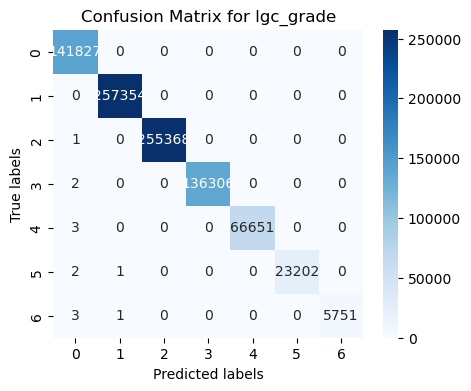

Training and evaluating lgc_grade:  90%|█████████████████████████████████████████▍    | 90/100 [08:50<00:58,  5.89s/it]


In [ ]:
lgc_clf = LogisticRegression(random_state=42, class_weight='balanced')


lgc_clf_pipeline = Pipeline([
    ('preprocessor', preprocessor_grade),
    ('classifier', lgc_clf)
])

train_evaluate_save(lgc_clf_pipeline, "lgc_grade",X_train=X_train_grade,
                   y_train=y_train_grade)

### eXtreme Gradient Boosting

Training and evaluating xgb_grade:  90%|█████████████████████████████████████████▍    | 90/100 [05:03<00:38,  3.82s/it]

xgb_grade Accuracy: 0.9980664927939066
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    141827
           1       1.00      1.00      1.00    257354
           2       1.00      1.00      1.00    255369
           3       1.00      1.00      1.00    136308
           4       1.00      0.99      1.00     66654
           5       0.98      0.99      0.99     23205
           6       0.90      0.94      0.92      5755

    accuracy                           1.00    886472
   macro avg       0.98      0.99      0.99    886472
weighted avg       1.00      1.00      1.00    886472



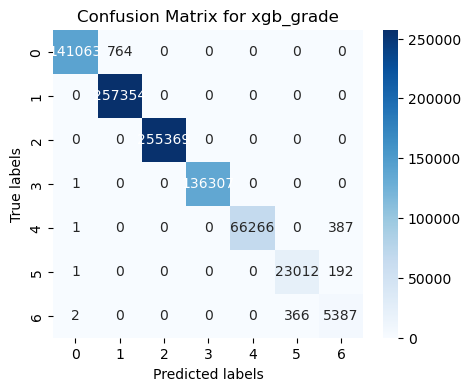

Training and evaluating xgb_grade:  90%|█████████████████████████████████████████▍    | 90/100 [05:06<00:34,  3.41s/it]


In [ ]:
class_counts = y_train_grade.value_counts()

y_train_encoded = label_encoder.fit_transform(y_train_grade)
class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_train_encoded),
    y=y_train_encoded)
weights = class_weights[y_train_encoded]

xgb_clf = XGBClassifier(random_state=42,
                        eval_metric='logloss')
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_grade),
    ('classifier', xgb_clf)
])

train_evaluate_save(xgb_pipeline, "xgb_grade",X_train=X_train_grade,
                   y_train=y_train_encoded,
                   sample_weight=weights)

In [ ]:
preprocessor_grade.fit(X_train_grade,y_train_encoded)
joblib.dump(preprocessor_grade, "xgb_preprocessor_grade.pkl")
label_encoder = LabelEncoder()
xgb_grade=joblib.load("xgb_grade.pkl")
xgb_grade_model = xgb_grade.named_steps["classifier"]
X_test_grade_prepared = preprocessor_grade.transform(X_test_grade)
y_test_grade_prediction = xgb_grade_model.predict(X_test_grade_prepared)
y_text_grade_encoded = label_encoder.fit_transform(y_test_grade)

print("Accuracy:", accuracy_score(y_text_grade_encoded, y_test_grade_prediction))
print("Classification Report:\n", classification_report(
    y_text_grade_encoded, y_test_grade_prediction, zero_division='warn'))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31535
           1       1.00      1.00      1.00     51171
           2       1.00      1.00      1.00     58642
           3       1.00      1.00      1.00     28979
           4       1.00      1.00      1.00     11362
           5       1.00      1.00      1.00      3737
           6       1.00      1.00      1.00      2022

    accuracy                           1.00    187448
   macro avg       1.00      1.00      1.00    187448
weighted avg       1.00      1.00      1.00    187448



## Deploying the xgboost for predicting grade from Google cloud

In [ ]:
import requests

# Google cloud link
endpoint_url = 'https://predictgradeapp-lbydg4vitq-nw.a.run.app'

# Replace this with the actual data extracted from the image
data_to_predict = {
    "loan_amnt": 10000.0,
    "term": "36 months",
    "int_rate": 12.0,
    "loan_status": "Fully Paid",
    "sub_grade": "C1",
    "bc_util": 50.0,
    "fico_range_high": 700,
    "revol_util": 30.0,
    "emp_length": "10+ years",
    "home_ownership": "MORTGAGE",
    "addr_state": "CA",
    "fico_range_low": 690,
    "inq_last_6mths": 1,
    "annual_inc": 80000.0,
    "bc_open_to_buy": 12000.0,
    "dti": 15.0,
    "mths_since_recent_inq": 5,
    "total_acc": 25,
    "num_op_rev_tl": 10

}


# Send a POST request with the JSON payload
response = requests.post(f"{endpoint_url}/grade/",
                         json=data_to_predict)

# Check the response
if response.status_code == 200:
    print("Prediction successful:", response.json())
else:
    print("Prediction failed with status code:", response.status_code)


Prediction successful: {'predicted_grade': 'C'}


## Subgrade Prediction

In [ ]:
X_train_subgrade = train_df.drop(['sub_grade', 'issue_d'], axis=1)
y_train_subgrade = train_df['sub_grade']
X_test_subgrade = test_df.drop(['sub_grade', 'issue_d'], axis=1)
y_test_subgrade = test_df['sub_grade']

In [ ]:
drops = ["issue_d","year","sub_grade"]
categorical_features = [columns for columns in df.columns if
                       columns not in numeric_features + drops]


### Logistic Regression

Training and evaluating sub_grade:   0%|                                                       | 0/100 [00:00<?, ?it/s]lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Training and evaluating sub_grade:  50%|███████████████████████                       | 50/100 [03:14<03:14,  3.89s/it]lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed

sub_grade Accuracy: 0.7206973260294741
              precision    recall  f1-score   support

          A1       1.00      0.95      0.97     25897
          A2       0.84      0.80      0.82     21559
          A3       0.60      0.79      0.68     21967
          A4       0.90      0.80      0.84     31541
          A5       0.88      0.86      0.87     40863
          B1       0.72      0.78      0.75     45386
          B2       0.78      0.67      0.72     48861
          B3       0.82      0.69      0.75     53703
          B4       0.73      0.77      0.75     56132
          B5       0.72      0.83      0.77     53272
          C1       0.69      0.71      0.70     56229
          C2       0.78      0.72      0.75     53118
          C3       0.70      0.61      0.66     51272
          C4       0.68      0.69      0.68     50585
          C5       0.61      0.73      0.67     44165
          D1       0.79      0.61      0.69     35789
          D2       0.67      0.70      0.6

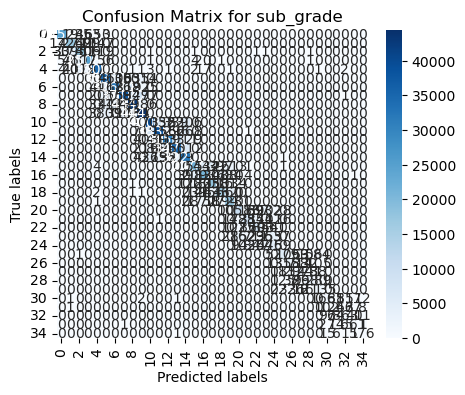

Training and evaluating sub_grade:  90%|█████████████████████████████████████████▍    | 90/100 [17:29<01:56, 11.67s/it]


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline_subgrade = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight="balanced"))
])


train_evaluate_save(pipeline_subgrade, "sub_grade",X_train=X_train_subgrade,
                   y_train=y_train_subgrade)



### Random Forest

Training and evaluating rcf_sub_grade:  90%|███████████████████████████████████    | 90/100 [4:16:55<36:44, 220.41s/it]

rcf_sub_grade Accuracy: 0.7160384084325281
              precision    recall  f1-score   support

          A1       1.00      0.95      0.97     25897
          A2       0.84      0.80      0.82     21559
          A3       0.78      0.74      0.76     21967
          A4       0.86      0.80      0.83     31541
          A5       0.81      0.92      0.86     40863
          B1       0.82      0.71      0.76     45386
          B2       0.79      0.67      0.73     48861
          B3       0.78      0.68      0.73     53703
          B4       0.67      0.79      0.72     56132
          B5       0.71      0.84      0.77     53272
          C1       0.75      0.71      0.73     56229
          C2       0.72      0.71      0.72     53118
          C3       0.65      0.62      0.63     51272
          C4       0.68      0.66      0.67     50585
          C5       0.64      0.69      0.66     44165
          D1       0.58      0.71      0.64     35789
          D2       0.71      0.69     

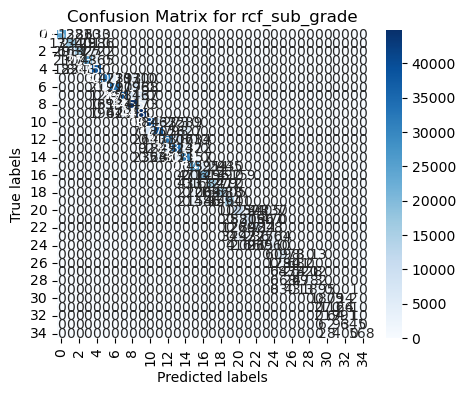

Training and evaluating rcf_sub_grade:  90%|███████████████████████████████████    | 90/100 [4:17:44<28:38, 171.82s/it]


In [ ]:
rcf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_jobs=6,random_state=42,class_weight="balanced"))
])


train_evaluate_save(rcf_pipeline, "rcf_sub_grade",X_train=X_train_subgrade,
                   y_train=y_train_subgrade)

### eXtreme Gradient Boosting

Training and evaluating xgb_subgrade:  90%|██████████████████████████████████████▋    | 90/100 [21:36<02:42, 16.30s/it]

xgb_subgrade Accuracy: 0.71807118555352
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     25897
           1       0.70      0.84      0.76     21559
           2       0.60      0.84      0.70     21967
           3       0.95      0.76      0.84     31541
           4       0.99      0.85      0.92     40863
           5       0.86      0.68      0.76     45386
           6       0.69      0.65      0.67     48861
           7       0.67      0.72      0.69     53703
           8       0.65      0.75      0.70     56132
           9       0.82      0.81      0.82     53272
          10       0.78      0.68      0.73     56229
          11       0.71      0.75      0.73     53118
          12       0.71      0.64      0.67     51272
          13       0.65      0.66      0.66     50585
          14       0.63      0.74      0.68     44165
          15       0.77      0.67      0.71     35789
          16       0.64      0.71      0.

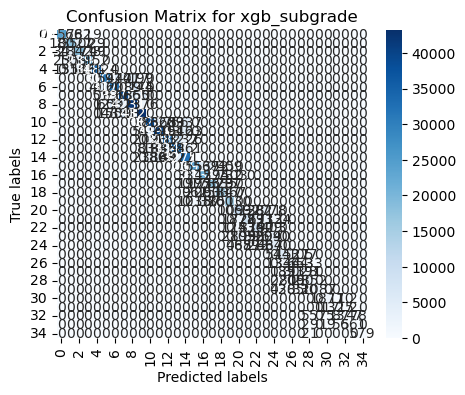

Training and evaluating xgb_subgrade:  90%|██████████████████████████████████████▋    | 90/100 [21:42<02:24, 14.47s/it]


In [ ]:
class_counts = y_train_subgrade.value_counts()

y_train_encoded = label_encoder.fit_transform(y_train_subgrade)
class_weights = compute_class_weight(
    'balanced', classes=np.unique(y_train_encoded),
    y=y_train_encoded)
weights = class_weights[y_train_encoded]

xgb_clf_sub_grade = XGBClassifier(random_state=42,
                        use_label_encoder=False,
                        eval_metric='logloss')
xgb_sub_grade_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_clf_sub_grade)
])

train_evaluate_save(xgb_sub_grade_pipeline, "xgb_subgrade",X_train=X_train_subgrade,
                   y_train=y_train_encoded,
                   sample_weight=weights)

## Rate Prediction

In [ ]:
X_train_rate = train_df.drop(['int_rate', 'issue_d'], axis=1)
y_train_rate = train_df['int_rate']
X_test_rate = test_df.drop(['int_rate', 'issue_d'], axis=1)
y_test_rate = test_df['int_rate']

In [ ]:
drops = ["issue_d","year","int_rate"]
numeric_features = [columns for columns in numeric_features if
                       columns not in drops]
categorical_features = [columns for columns in df.columns if
                       columns not in numeric_features + drops]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Ridge Regression

In [ ]:
ridge_regressor = Ridge()

pipeline_rate_ridge = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ridge_regressor)
])

pipeline_rate_ridge.fit(X_train_rate, y_train_rate)


y_train_pred = cross_val_predict(pipeline_rate_ridge,
                                 X_train_rate, y_train_rate, cv=5)

mse_rate = mean_squared_error(y_train_rate, y_train_pred)
print(f'Interest Rate Prediction MSE: {mse_rate}')

Interest Rate Prediction MSE: 0.9899346263047043


### LightGBM

In [ ]:
lgbm_regressor = LGBMRegressor(random_state=42,verbose = -1)


pipeline_rate = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', lgbm_regressor)
])


pipeline_rate.fit(X_train_rate, y_train_rate)
y_train_pred = cross_val_predict(pipeline_rate,
                                 X_train_rate, y_train_rate, cv=5)

mse_rate = mean_squared_error(y_train_rate, y_train_pred)
print(f'Interest Rate Prediction MSE: {mse_rate}')

Interest Rate Prediction MSE: 0.970408343641032


### Catboost

In [ ]:
catboost_regressor = CatBoostRegressor(
    random_state=42, verbose=0)


pipeline_rate_cat = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', catboost_regressor)
])


pipeline_rate_cat.fit(X_train_rate, y_train_rate)
y_train_pred = cross_val_predict(pipeline_rate_cat,
                                 X_train_rate, y_train_rate, cv=5)

mse_rate = mean_squared_error(y_train_rate, y_train_pred)
print(f'Interest Rate Prediction MSE: {mse_rate}')

Interest Rate Prediction MSE: 0.9588749695792421


## Fine-Tune Models

### Randomized Search

#### Classifiers and their respective hyperparameter grids

In [ ]:
classifiers = [
    (
        "Ridge",
        Ridge(),
        {"alpha": uniform(0.1, 1000)}
    ),
    (
        "LightGBM",
        LGBMRegressor(random_state=42),
        {
            "learning_rate": uniform(0.01, 0.1),
            "n_estimators": randint(100, 1000),
            "max_depth": randint(3, 7)
        },
    ),
    (
        "CatBoost",
        CatBoostRegressor(random_state=42, verbose=0),
        {
            "learning_rate": uniform(0.01, 0.1),
            "depth": randint(3, 7),
            "iterations": randint(100, 1000)
        },
    ),
]

In [ ]:
preprocessor.fit(X_train_rate)
X_train_prepared = preprocessor.transform(X_train_rate)
X_test_prepared = preprocessor.transform(X_test_rate)


mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


for name, classifier, param_dist in classifiers:
    random_search = RandomizedSearchCV(
        classifier, param_distributions=param_dist, n_iter=100,
        scoring=mse_scorer, cv=5, verbose=1, n_jobs=6, random_state=42
    )
    random_search.fit(X_train_prepared, y_train_rate)

    best_model = random_search.best_estimator_
    y_test_predictions = best_model.predict(X_test_prepared)

    print(name)
    print("Best Parameters:", random_search.best_params_)
    print("MSE:", mean_squared_error(y_test_rate, y_test_predictions))
    print("-" * 80)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Ridge
Best Parameters: {'alpha': 20.68449429580245}
MSE: 2.2415903006066125
--------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 886472, number of used features: 366
[LightGBM] [Info] Start training from score 13.310498
[LightGBM] [Warning] No further splits with posi

### LightGBM model with tuned hyperparameters

In [ ]:
preprocessor.fit(X_train_rate)
joblib.dump(preprocessor, "preprocessor_rate.pkl")
X_train_prepared = preprocessor.transform(X_train_rate)

tuned_lgbm_params_rate = {
    "learning_rate": 0.1,
    "max_depth": 7,
    "n_estimators": 1000,
}

tuned_lgbm_model_rate = LGBMRegressor(verbose = -1,
                                      **tuned_lgbm_params_rate)
tuned_lgbm_model_rate.fit(X_train_prepared, y_train_rate)

joblib.dump(tuned_lgbm_model_rate, "tuned_lgbm_rate_model.pkl")

['tuned_lgbm_rate_model.pkl']

In [ ]:
df[:15].to_csv("df_rate.csv")

In [ ]:
library_versions = {
    'numpy': np.__version__,
    'pandas': pd.__version__,
    'joblib': joblib.__version__,
    'sklearn': sklearn.__version__,
    'xgboost': xgb.__version__
}

library_versions

{'numpy': '1.23.5',
 'pandas': '1.5.3',
 'joblib': '1.1.1',
 'sklearn': '1.2.1',
 'xgboost': '2.0.0'}

## Deploying the tuned_LightGBM for interest rate from Google cloud

In [ ]:
import requests

# Google cloud link
endpoint_url = 'https://interestrateapp-lbydg4vitq-nw.a.run.app'

# Replace this with the actual data extracted from the image
data_to_predict = {
    "loan_amnt": 10000.0,
    "term": "36 months",
    "loan_status": "Fully Paid",
    "sub_grade": "C1",
    "bc_util": 50.0,
    "fico_range_high": 700,
    "revol_util": 30.0,
    "emp_length": "10+ years",
    "home_ownership": "MORTGAGE",
    "addr_state": "CA",
    "fico_range_low": 690,
    "inq_last_6mths": 1,
    "annual_inc": 80000.0,
    "bc_open_to_buy": 12000.0,
    "dti": 15.0,
    "mths_since_recent_inq": 5,
    "total_acc": 25,
    "num_op_rev_tl": 10,
    "grade": "B"
}


# Send a POST request with the JSON payload
response = requests.post(f"{endpoint_url}/interest_rate/",
                         json=data_to_predict)

# Check the response
if response.status_code == 200:
    print("Prediction successful:", response.json())
else:
    print("Prediction failed with status code:", response.status_code)


Prediction successful: {'predicted_interest_rate': 11.55543290964464}
